## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [4]:
# Let's import the dataset

df = pd.read_csv(r'E:\Study\Projects\EDA\generated_dataset.csv')
pd.set_option('display.max_columns', None)

In [5]:
# Let's view the top 5 records of our dataset

df.head()

,id,name,region,product,category,sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2024-04-21,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2023-04-23,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-22,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2024-07-17,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2024-02-26,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250


In [6]:
# Let's find the no. of rows and columns of our dataset
df.shape

(1500, 70)

In [7]:
# Let's see the information or description of our dataset like column names, datatype, null or not etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1500 non-null   object 
 1   name      1500 non-null   object 
 2   region    1500 non-null   object 
 3   product   1500 non-null   object 
 4   category  1500 non-null   object 
 5   sales     1500 non-null   float64
 6   quantity  1500 non-null   int64  
 7   date      1500 non-null   object 
 8   revenue   1391 non-null   float64
 9   cost      1441 non-null   float64
 10  rating    1500 non-null   float64
 11  col_12    1500 non-null   int64  
 12  col_13    1500 non-null   float64
 13  col_14    1500 non-null   int64  
 14  col_15    1500 non-null   float64
 15  col_16    1500 non-null   int64  
 16  col_17    1500 non-null   float64
 17  col_18    1500 non-null   int64  
 18  col_19    1500 non-null   float64
 19  col_20    1500 non-null   int64  
 20  col_21    1415 non-null   floa

## 1. Load csv file and display first 10 rows.

In [9]:
# Since we have already loaded the dataset, we will display the first 10 rows.

df.head(10)

,id,name,region,product,category,sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2024-04-21,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2023-04-23,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-22,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2024-07-17,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2024-02-26,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250
5,ID_6,Name_16,North,Product_7,Food,995.36,19,2024-08-08,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188
6,ID_7,Name_15,East,Product_19,Food,5056.51,14,2024-05-26,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15
7,ID_8,Name_9,South,Product_12,Clothing,1879.74,23,2022-07-27,1911.91,1491.73,1.58,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440
8,ID_9,Name_48,North,Product_20,Accessories,5895.93,28,2023-11-27,8370.32,4219.05,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,

## 2. Filter the rows in a DataFrame where the column sales is greater than 1000.

In [11]:
greater_sales = df[df['sales'] > 1000]
greater_sales

,id,name,region,product,category,sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2024-04-21,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2023-04-23,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-22,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2024-07-17,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2024-02-26,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ID_1496,Name_24,South,Product_14,Furniture,6038.23,38,2022-10-31,6431.85,4918.88,2.37,20,332.29,469,963.83,235,616.79,320,696.71,319,NaN,195,628.81,143,530.38,163,271.41,255,966.97,341,620.35,343,773.96,408,484.74,258,286.64,328,213.42,179,719.39,121,792.30,464.0,771.03,343,731.98,192,20.92,165,754.71,165,647.87,56,949.65,102,221.71,132,1.48,419,698.79,240,969.96,87,414.64,442,364.16,411,687.93,176
1496,ID_1497,Name_44,East,Product_18,Clothing,7754.59,49,2024-09-08,9366.62,3970.29,2.50,395,136.13,128,534.77,266,543.20,62,480.42,416,121.51,23,569.69,466,535.08,252,395.94,457,271.84,93,390.78,14,214.91,254,373.26,169,118.27,374,502.66,150,489.50,246,100.46,232.0,718.42,86,775.63,499,698.15,460,191.84,174,67.67,251,393.52,57,358.12,172,616.09,204,925.71,272,NaN,290,184.04,143,428.47,300,960.72,281
1497,ID_1498,Name_48,North,Product_18,Furniture,3202.76,52,2022-07-11,4035.29,1862.82,2.22,5,851.01,358,475.15,484,114.02,234,243.21,461,542.00,148,103.24,130,658.12,345,NaN,419,250.58,347,908.05,446,572.24,222,495.36,207,699.15,70,875.30,466,31.95,279,58.85,256.0,372.20,344,509.25,293,NaN,362,225.12,173,364.05,161,177.70,80,389.93,438,398.75,224,NaN,366,865.24,219,28.07,295,500.56,392,580.21,243
1498,ID_1499,Name_44,West,Product_13,Food,8340.11

## 3. Select only columns 'name' and 'sales'

In [13]:
name_and_sales = df[['name','sales']]
name_and_sales

,name,sales
0,Name_41,9198.42
1,Name_8,6930.53
2,Name_2,9046.39
3,Name_48,4689.43
4,Name_18,6496.40
...,...,...
1495,Name_24,6038.23
1496,Name_44,7754.59
1497,Name_48,3202.76
1498,Name_44,8340.11


## 4. Sort a DataFrame by the column date in ascending order

In [15]:
df['date'] = sorted(df['date'])
df.head()

,id,name,region,product,category,sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2022-01-01,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-03,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2022-01-04,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250


## 5. Add a new column called profit which is the difference between the columns revenue and cost

In [17]:
df['profit'] = df['revenue'] - df['cost']

In [18]:
df.head()

,id,name,region,product,category,sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2022-01-01,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252,3328.80
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-03,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12,NaN
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2022-01-04,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493,1415.42
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58


## 6. Rename the column sales to total_sales

In [20]:
# Renaming the column sales to total_sales

df.rename(mapper={'sales':'total_sales'},axis=1, inplace=True)

In [21]:
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
0,ID_1,Name_41,West,Product_12,Food,9198.42,96,2022-01-01,10316.70,6987.90,4.37,326,711.37,411,395.83,431,206.26,296,757.41,167,NaN,184,173.50,312,18.86,167,110.17,322,87.68,10,604.89,180,194.96,50,687.81,126,816.28,382,468.33,413,693.96,417,232.84,52.0,77.31,175,685.76,435,792.65,121,180.89,443,110.20,425,377.91,188,619.14,276,664.96,145,80.20,173,36.99,285,859.86,410,87.24,194,538.93,252,3328.80
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
2,ID_3,Name_2,North,Product_15,Clothing,9046.39,31,2022-01-03,NaN,7992.03,1.11,304,373.02,191,440.35,480,536.43,120,922.83,481,344.13,51,181.93,105,390.96,348,48.07,351,953.97,126,222.52,340,151.36,276,347.86,334,975.16,109,189.03,17,249.01,33,133.07,174.0,46.24,152,176.45,52,851.88,294,388.97,222,821.76,91,313.45,227,264.80,145,869.45,4,714.42,172,706.28,88,297.11,161,396.00,311,769.80,12,NaN
3,ID_4,Name_48,South,Product_4,Food,4689.43,55,2022-01-04,5621.50,4206.08,1.10,22,2.74,328,930.31,107,533.22,17,194.62,34,803.80,423,12.79,211,580.28,324,643.22,170,238.61,349,910.59,417,147.84,298,961.54,98,425.73,392,735.93,335,979.74,228,579.76,NaN,175.91,357,939.44,414,906.28,134,238.93,56,206.60,390,581.83,478,737.95,96,881.26,306,741.32,140,640.95,286,475.11,41,547.57,450,789.10,493,1415.42
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58


## 7. Drop all rows with missing values in any column of the DataFrame

In [23]:
df = df.dropna()
df

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58
5,ID_6,Name_16,North,Product_7,Food,995.36,19,2022-01-05,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,27.04
6,ID_7,Name_15,East,Product_19,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37
7,ID_8,Name_9,South,Product_12,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,1.58,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,420.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,ID_1487,Name_36,North,Product_3,Furniture,5752.64,79,2024-12-26,6982.90,4770.67,4.31,310,712.68,485,79.90,259,464.79,68,440.81,189,831.47,477,724.43,347,907.10,470,418.60,226,513.20,333,335.46,189,244.90,129,518.70,288,249.33,450,540.74,139,400.31,252,776.35,170.0,684.06,131,915.35,311,761.48,294,697.74,100,359.42,161,647.94,212,880.51,159,89.44,173,527.45,304,843.68,285,876.23,64,421.37,285,187.34,21,2212.23
1490,ID_1491,Name_1,North,Product_6,Food,5846.16,14,2024-12-28,7606.07,3277.08,1.48,465,958.01,316,652.03,211,120.69,272,51.77,159,904.60,486,768.65,106,726.78,426,296.80,298,738.82,335,988.83,354,685.18,402,974.36,66,584.97,36,984.48,36,746.34,309,805.91,5.0,399.06,332,258.24,330,543.17,171,454.34,291,429.34,44,785.50,187,173.20,187,474.68,169,964.42,483,597.92,235,399.28,391,714.73,468,13.51,121,4328.99
1492,ID_1493,Name_35,South,Product_3,Furniture,5300.08,8,2024-12-29,7146.77,4067.64,3.65,370,967.63,276,28.32,125,422.93,431,373.98,373,703.22,205,952.30,1,743.74,483,108.27,126,521.78,443,981.08,166,492.89,166,730.63,281,975.78,393,471.17,336,817.14,364,190.07,393.0,17.07,139,485.76,7,684.86,178,202.14,350,205.39,262,55.56,223,101.30,99,404.63,325,870.23,474,500.53,202,671

In [24]:
# This is to check whether the dataframe is null or not.
#If it is null, the specific column will give the output more than 0.

df.isnull().sum()

id          0
name        0
region      0
product     0
category    0
           ..
col_67      0
col_68      0
col_69      0
col_70      0
profit      0
Length: 71, dtype: int64

## 8. Find the number of unique values in the column region

In [26]:
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3.49,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,1.11,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58
5,ID_6,Name_16,North,Product_7,Food,995.36,19,2022-01-05,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,27.04
6,ID_7,Name_15,East,Product_19,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37
7,ID_8,Name_9,South,Product_12,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,1.58,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,420.18


In [27]:
# Below is the code to find the no. of unique values in the region column
df['region'].nunique()

4

## 9. Group the DataFrame by the column category and calculate the sum of sales for each group

In [29]:
# Below is the code to group the category and the sum of sales for each group.
group_sales = df.groupby('category')['total_sales'].sum()
group_sales

category
Accessories    837910.30
Clothing       735953.52
Electronics    692415.92
Food           723636.15
Furniture      676826.92
Name: total_sales, dtype: float64

## 10. Create a DataFrame from a dictionary of lists

In [31]:
# Let's create a data argument of DataFrame using dict and index using the split().
dat = pd.DataFrame(
    {
    'S.No':list(range(1, 7)),
    'Name':'Arun Kumar Shanmuga Priya Mithran Tharika'.split(),
    'Age': [35, 30, 8, 3, 35, 30]
    },index='Fa ther Mo ther Fkid Skid'.split()
)
dat

,S.No,Name,Age
Fa,1,Arun,35
ther,2,Kumar,30
Mo,3,Shanmuga,8
ther,4,Priya,3
Fkid,5,Mithran,35
Skid,6,Tharika,30


In [32]:
# Let's create a dataframe using random numerical values of numpy library.
# This is just another way of creation of dataframe.

from numpy.random import randn
data = pd.DataFrame(randn(40,9), list(range(0,40)), 'fan_id table_id board_id door_id cloth_id book_id bag_id doll_id light_id'.split())
data.iloc[1, 8] = np.nan  # Missing value in row 1, column 8
data.iloc[2, 1] = np.nan  # Missing value in row 2, column 1
data.iloc[3, 6] = np.nan  # Missing value in row 3, column 6
data.iloc[5, 3] = np.nan  # Missing value in row 5, column 3
data.iloc[10, 6] = np.nan  # Missing value in row 10, column 6
data.iloc[11:13, 4] = np.nan  # Missing value in row 10, column 6
data.iloc[20:22, 1] = np.nan  # Missing values in rows 20-21, column 1
data.iloc[30, [2, 4]] = np.nan  # Missing values in row 30, columns 2 and 4

In [33]:
data.head(20)

,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,-0.494483,1.889322,1.449536,1.298823,-0.447061,-0.668337,0.440829,0.163283,-1.445044
1,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
2,0.065086,NaN,-0.726306,0.184994,-1.424656,-0.554296,0.857514,-1.496475,1.272468
3,1.493361,0.431571,1.451377,0.002334,0.424719,-0.160556,NaN,0.041576,-1.125257
4,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
5,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
6,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
7,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142
8,1.020566,0.464753,-1.055531,-2.113006,-1.699353,1.302594,0.296111,0.491229,-0.071172
9,-1.069713,0.066995,2.024414,0.297915,-2.536127,1.131246,-0.781706,-0.083460,0.878563


## 11. Check if there are any missing values in a DataFrame

In [35]:
# Let's check if there is any missing values in dataframe. We can do this in 2 ways.
# First way which is straight forward.

data.isnull().sum()

fan_id      0
table_id    3
board_id    1
door_id     1
cloth_id    3
book_id     0
bag_id      2
doll_id     0
light_id    1
dtype: int64

In [36]:
# Check the total missing values in a dataframe.
len(data.isnull().sum())

9

In [37]:
# Second method to check the null values of a dataframe using list comprehension
nan_feature = [feature for feature in data.columns if data[feature].isnull().sum() > 1]
for feature in nan_feature:
    print(f'{feature}: {np.round(data[feature].isnull().mean(), 4)} % of null values')
    #print(f'{feature} {np.round(df[feature]).isnull().mean(), 4} : % of features')

table_id: 0.075 % of null values
cloth_id: 0.075 % of null values
bag_id: 0.05 % of null values


In [38]:
nan_feature

['table_id', 'cloth_id', 'bag_id']

## 12. Replace all occurrences of the value -1 in the column rating with NaN

In [40]:
# Since we don't have -1 in rating column we will replace few values listed below with -1
# Note, we are using 'df' dataframe and not 'data' dataframe.
df.replace([1.11, 1.58, 3.49, 4.05, 3.89, 1.27], [-1, -1, -1, -1, -1, -1], inplace=True)
df.head(50)

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,-1.00,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,-1.00,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58
5,ID_6,Name_16,North,Product_7,Food,995.36,19,2022-01-05,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,27.04
6,ID_7,Name_15,East,Product_19,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37
7,ID_8,Name_9,South,Product_12,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,-1.00,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,420.18
8,ID_9,Name_48,North,Product_20,Accessories,5895.93,28,2022-01-08,8370.32,4219.05,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,4151.27
10,ID_11,Name_44,East,Product_6,Furniture,5509.43,57,2022-01-09,7058.44,4690.68,-1.00,16,736.55,491,313.56,358,604.93,490,183.88,88,781.84,120,979.73,135,329.20,16,230.02,18,816.41,319,485.52,16,543.17,471,179.02,334,25.33,172,11.57,484,967.84,187,196.97,175.0,286.93,487,45.40,490,301.15,281,552.78,149,766.76,133,61.00,374,271.83,30,376.99,247,947.51,113,835.32,385,933.99,58,727.73,79,94.83,138,2367.76
11,ID_12,Name_48,West,Product_20,Accessories,3991.36,53,2022-01-10,3717.93,3270.05,-1.00,131,504.98,122,659.91,355,662.88,297,253.08,324,768.38,49,966.04,289,655.89,400,679.55,156,732.00,185,976.44,360,438.83,190,283.95,489,416.01,333,3.04,107,143.89,286,208.61,351.0,160.76,431,707.21,110,260.76,37,947.18,334,725.16,463,467.69,236,342.61,303,473.24,226,844.32,358,692.26,167,675.33,437,851.29,263,240.40,207,447.88
13,ID_14,Name_6,South,Product_7,Electronics,346.63,76,2022-01-11,380.76,264.71,1.40,243,889.59,330,613.70,104,394.50,107,680.47,484,376.84,200,579.57,484,299.32,310,926.17,439,971.08,267,498.67,446,103.87,67,456.55,387,611.22,437,134.75,114,474.88,211

In [41]:
# Let's now replace all -1 values with NaN
df.replace(-1, np.NaN, inplace=True)
df.head(50)

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
1,ID_2,Name_8,East,Product_3,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58
5,ID_6,Name_16,North,Product_7,Food,995.36,19,2022-01-05,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,27.04
6,ID_7,Name_15,East,Product_19,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37
7,ID_8,Name_9,South,Product_12,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,420.18
8,ID_9,Name_48,North,Product_20,Accessories,5895.93,28,2022-01-08,8370.32,4219.05,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,4151.27
10,ID_11,Name_44,East,Product_6,Furniture,5509.43,57,2022-01-09,7058.44,4690.68,NaN,16,736.55,491,313.56,358,604.93,490,183.88,88,781.84,120,979.73,135,329.20,16,230.02,18,816.41,319,485.52,16,543.17,471,179.02,334,25.33,172,11.57,484,967.84,187,196.97,175.0,286.93,487,45.40,490,301.15,281,552.78,149,766.76,133,61.00,374,271.83,30,376.99,247,947.51,113,835.32,385,933.99,58,727.73,79,94.83,138,2367.76
11,ID_12,Name_48,West,Product_20,Accessories,3991.36,53,2022-01-10,3717.93,3270.05,NaN,131,504.98,122,659.91,355,662.88,297,253.08,324,768.38,49,966.04,289,655.89,400,679.55,156,732.00,185,976.44,360,438.83,190,283.95,489,416.01,333,3.04,107,143.89,286,208.61,351.0,160.76,431,707.21,110,260.76,37,947.18,334,725.16,463,467.69,236,342.61,303,473.24,226,844.32,358,692.26,167,675.33,437,851.29,263,240.40,207,447.88
13,ID_14,Name_6,South,Product_7,Electronics,346.63,76,2022-01-11,380.76,264.71,1.40,243,889.59,330,613.70,104,394.50,107,680.47,484,376.84,200,579.57,484,299.32,310,926.17,439,971.08,267,498.67,446,103.87,67,456.55,387,611.22,437,134.75,114,474.88,211,594.26,43

## 13. Filter rows where the column product starts with the letter A

In [43]:
# Since we don't have any values that starts with A, we will first replace few values with A.
df.replace('Product_3 Product_19 Product_12 Product_7 Product_2 Product_11 Product_16 Product_19'.split(),
           'Arun arumugam rama senthalampoo shiva senathipathi Aravind Aran'.split(), inplace=True)
#column_with_A = df['product'].filter(like = 'A')
#column_with_A

In [44]:
# Filtering the product column values that starts with A only
# Remember since python is case sensitive, it ignored a column value that starts with small 'a'

columns_with_A = df[df['product'].str.startswith('A')]
columns_with_A

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit
1,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97
6,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37
41,ID_42,Name_18,East,Aravind,Electronics,7714.65,86,2022-01-23,10990.86,6663.19,3.64,279,38.71,156,485.51,181,618.85,280,131.86,334,476.79,452,52.47,421,837.45,322,359.31,122,632.34,63,731.58,92,740.03,32,972.99,483,495.97,98,842.66,282,761.02,487,907.38,261.0,138.60,301,343.24,230,519.77,240,833.83,90,548.02,214,363.58,57,57.21,158,502.62,339,197.63,56,407.17,471,779.54,142,152.02,491,251.78,429,4327.67
43,ID_44,Name_14,West,Aran,Accessories,3149.82,33,2022-01-25,3197.60,2413.90,3.87,43,904.38,436,594.12,13,261.91,445,242.28,2,662.18,297,885.05,107,456.03,288,89.05,162,64.23,297,691.15,81,941.96,218,54.39,456,562.86,453,881.61,210,52.47,453,787.32,262.0,911.53,130,452.44,224,760.91,189,287.71,123,966.32,449,123.29,382,11.96,336,482.29,55,431.38,63,787.78,448,842.21,327,418.31,289,637.13,42,783.70
49,ID_50,Name_7,South,Arun,Furniture,9608.30,47,2022-01-28,7829.28,6745.13,2.20,473,449.25,301,178.93,140,14.57,389,222.31,337,390.79,469,868.14,258,699.44,243,404.95,155,128.36,300,69.83,442,529.78,339,584.00,197,972.96,316,87.44,479,171.27,343,42.90,493.0,501.41,33,524.66,68,957.31,426,620.23,333,419.51,106,134.45,216,908.23,200,75.38,493,431.80,155,24.39,1,240.26,189,479.07,149,283.58,57,1084.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,ID_1457,Name_9,East,Arun,Furniture,374.27,61,2024-11-29,554.93,250.01,3.19,382,844.70,278,357.75,203,314.27,488,399.33,250,371.57,253,685.05,295,924.90,186,841.98,455,327.39,260,9.27,380,736.32,225,926.76,419,652.48,136,376.31,446,445.52,369,891.09,351.0,903.66,498,458.02,265,27.53,454,262.89,467,971.14,246,590.57,100,880.80,36,958.80,260,303.98,152,381.86,420,577.36,89,346.67,173,988.00,144,304.92
1469,ID_1470,Name_18,West,Aran,Accessories,6478.51,13,2024-12-11,8942.91,3280.33,3.86,4,506.44,41,89.81,131,862.66,217,373.79,221,999.19,46,34.27,447,337.96,55,869.50,441,270.48,197,407.20,181,681.06,242,733.80,44,24.47,89,826.81,395,176.73,108,158.74,331.0,655.69,71,334.66,135,342.97,359,383.14,218,71.75,490,457.24,194,525.91,382,694.77,358,753.86,85,462.28,67,506.44,189,476.11,265,961.29,484,5662.58
1486,ID_1487,Name_36,North,Arun,Furniture,5752.64,79,2024-12-26,6982.90,4770.67,4.31,310,712.68,485,79.90,259,464.79,68,440.81,189,831.47,477,724.43,347,907.10,470,418.60,226,513.20,333,335.46,189,244.90,129,518.70,288,249.33,450,540.74,139,400.31,252,776.35,170.0,684.06,131,915.35,311,761.48,294,697.74,100,359.42,161,647.94,212,880.51,159,89.44,173,527.45,304,843.68,285,876.23,64,421.37,2

## 14. Add a column called discounted_price by applying a 10% discount to the price column

In [46]:
df['discounted_price'] = 0.01 * df['cost']
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,profit,discounted_price
1,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,3387.97,61.1322
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,4769.58,47.1743
5,ID_6,Name_16,North,senthalampoo,Food,995.36,19,2022-01-05,921.99,894.95,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,27.04,8.9495
6,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,1240.37,38.0315
7,ID_8,Name_9,South,rama,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,420.18,14.9173


In [47]:
# Move the position of columns. The column discounted_price & profit are in the last position.
# Moving it to the 11 position
#column = list(df.columns)
#column.insert(11, column.pop(-1))
#df.head()
columns_to_move = ['profit', 'discounted_price']
new_order = (list(df.columns[:10]) + columns_to_move + list(df.columns[10:-2]))
df = df[new_order]
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70
1,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177
4,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250
5,ID_6,Name_16,North,senthalampoo,Food,995.36,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188
6,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15
7,ID_8,Name_9,South,rama,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440


In [48]:
df.shape

(763, 72)

## 15. Merge two DataFrames on a common column called id

In [50]:
#data.shape
# Since we don't have id column in 'data' dataframe we first create it to merge with 'df' dataframe
data['id'] = df['id']
data.head()

,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,id
0,-0.494483,1.889322,1.449536,1.298823,-0.447061,-0.668337,0.440829,0.163283,-1.445044,NaN
1,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN,ID_2
2,0.065086,NaN,-0.726306,0.184994,-1.424656,-0.554296,0.857514,-1.496475,1.272468,NaN
3,1.493361,0.431571,1.451377,0.002334,0.424719,-0.160556,NaN,0.041576,-1.125257,NaN
4,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,ID_5


In [51]:
data.shape

(40, 10)

In [52]:
# changing the id column position
column_name = list(data.columns)
column_name.insert(0, column_name.pop(-1))
data = data[column_name]
data.head()

,id,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,NaN,-0.494483,1.889322,1.449536,1.298823,-0.447061,-0.668337,0.440829,0.163283,-1.445044
1,ID_2,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
2,NaN,0.065086,NaN,-0.726306,0.184994,-1.424656,-0.554296,0.857514,-1.496475,1.272468
3,NaN,1.493361,0.431571,1.451377,0.002334,0.424719,-0.160556,NaN,0.041576,-1.125257
4,ID_5,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045


In [53]:
# Since the id column in 'data' dataframe is of int64 datatype, we change it to object datatype.
# We do this because the id column of 'df' dataframe is object datatype.
# Remember, to merge two dataframe object, it need to be same datatype.
data['id'] = data['id'].astype('object')

df = pd.merge(df, data, on='id', how = 'inner')
df.head(60)

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
1,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,ID_6,Name_16,North,senthalampoo,Food,995.36,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,ID_8,Name_9,South,rama,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142
5,ID_9,Name_48,North,Product_20,Accessories,5895.93,28,2022-01-08,8370.32,4219.05,4151.27,42.1905,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,1.020566,0.464753,-1.055531,-2.113006,-1.699353,1.302594,0.296111,0.491229,-0.071172
6,ID_11,Name_44,East,Product_6,Furniture,5509.43,57,2022-01-09,7058.44,4690.68,2367.76,46.9068,NaN,16,736.55,491,313.56,358,604.93,490,183.88,88,781.84,120,979.73,135,329.20,16,230.02,18,816.41,319,485.52,16,543.17,471,179.02,334,25.33,172,11.57,484,967.84,187,196.97,175.0,286.93,487,45.40,490,301.15,281,552.78,149,766.76,133,61.00,374,271.83,30,376.99,247,947.51,113,835.32,385,933.99,58,727.73,79,94.83,138,-0.265768,-0.554170,-0.546187,-0.438714,0.20738

In [54]:
df.shape

(22, 81)

## 16. Create a DataFrame with only numerical columns from an existing DataFrame

In [56]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_features]

,total_sales,quantity,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,6930.53,96,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
1,6496.40,28,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,995.36,19,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,5056.51,14,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,1879.74,23,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142
5,5895.93,28,8370.32,4219.05,4151.27,42.1905,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,1.020566,0.464753,-1.055531,-2.113006,-1.699353,1.302594,0.296111,0.491229,-0.071172
6,5509.43,57,7058.44,4690.68,2367.76,46.9068,NaN,16,736.55,491,313.56,358,604.93,490,183.88,88,781.84,120,979.73,135,329.20,16,230.02,18,816.41,319,485.52,16,543.17,471,179.02,334,25.33,172,11.57,484,967.84,187,196.97,175.0,286.93,487,45.40,490,301.15,281,552.78,149,766.76,133,61.00,374,271.83,30,376.99,247,947.51,113,835.32,385,933.99,58,727.73,79,94.83,138,-0.265768,-0.554170,-0.546187,-0.438714,0.207385,-0.669878,NaN,0.554207,0.138035
7,3991.36,53,3717.93,3270.05,447.88,32.7005,NaN,131,504.98,122,659.91,355,662.88,297,253.08,324,768.38,49,966.04,289,655.89,400,679.55,156,732.00,185,976.44,360,438.83,190,283.95,489,416.01,333,3.04,107,143.89,286,208.61,351.0,160.76,431,707.21,110,260.76,37,947.18,334,725.16,463,467.69,236,342.61,303,473.24,226,844.32,3

In [57]:
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
1,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,ID_6,Name_16,North,senthalampoo,Food,995.36,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,ID_8,Name_9,South,rama,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142


## 17. Extract the year from a datetime column called order_date

In [59]:
# Since we don't have any column called 'order_date' with datetime datatype, let's first create it
# We now create a column called 'order_date' with datetime datatype.
# We need to import datetime & timedelta method from datetime library.
from datetime import datetime, timedelta

# We now create 'start_date' & 'end_date' variables to generate random dates between those dates
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
               for _ in range(22)
               ]
df['order_date'] = random_dates

In [60]:
df.head()

,id,name,region,product,category,total_sales,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,order_date
0,ID_2,Name_8,East,Arun,Clothing,6930.53,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN,2024-08-10
1,ID_5,Name_18,West,Product_8,Food,6496.40,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,2024-11-26
2,ID_6,Name_16,North,senthalampoo,Food,995.36,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038,2024-12-02
3,ID_7,Name_15,East,Aran,Food,5056.51,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,2024-05-06
4,ID_8,Name_9,South,rama,Clothing,1879.74,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,2024-09-04


In [61]:
# Bringing the order_date column before rating column

column_order = list(df.columns)
column_order.insert(6, column_order.pop(-1))
df = df[column_order]
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142


In [62]:
# Now, let's extract the year alone with simple dt.year property in datetime datatype
extracted_year = df['order_date'].dt.year
extracted_year

0     2024
1     2024
2     2024
3     2024
4     2024
5     2024
6     2024
7     2024
8     2024
9     2024
10    2024
11    2024
12    2024
13    2024
14    2024
15    2024
16    2024
17    2024
18    2024
19    2024
20    2024
21    2024
Name: order_date, dtype: int32

## 18. Save a DataFrame to a CSV file named output.csv

In [64]:
# Let's save the dataframe in csv format using 'df' dataframe

df.to_csv(r'E:\Study\Projects\EDA\output_pandas_practice.csv')

## 19. Reset the index of a DataFrame

In [66]:
rst_indx = df.reset_index()
rst_indx

,index,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,NaN,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
1,1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,NaN,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,NaN,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,NaN,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142
5,5,ID_9,Name_48,North,Product_20,Accessories,5895.93,2024-12-23,28,2022-01-08,8370.32,4219.05,4151.27,42.1905,2.63,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,1.020566,0.464753,-1.055531,-2.113006,-1.699353,1.302594,0.296111,0.491229,-0.071172
6,6,ID_11,Name_44,East,Product_6,Furniture,5509.43,2024-07-02,57,2022-01-09,7058.44,4690.68,2367.76,46.9068,NaN,16,736.55,491,313.56,358,604.93,490,183.88,88,781.84,120,979.73,135,329.20,16,230.02,18,816.41,319,485.52,16,543.17,471,179.02,334,25.33,172,11.57,484,967.84,187,196.97,175.0,286.93,487,45.40,490,301.15,281,552.78,149,766.76,133,61.00,374,271.83,30,37

## 20. Find the total sum of the column quantity

In [68]:
sum_of_quantity = df['quantity'].sum()
sum_of_quantity

1156

## 21. Extract rows where the rating column is between 3 and 4 (inclusive)

In [70]:
# We can use comparison operator here.
# Remember python normal 'and' operator will throw error. we need to use '&' operator for more than one condition.
# Also, note the parenthesis used for the seperation of two operations.

rating_three_four = [feature for feature in (df['rating'] >= 3) & (df['rating'] <= 4)]
df[rating_three_four]

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
21,ID_39,Name_45,East,senathipathi,Food,8640.46,2024-04-13,85,2022-01-22,7426.26,7730.60,-304.34,77.3060,3.06,45,449.27,350,259.91,62,305.12,40,610.04,209,553.77,339,237.65,312,979.62,141,404.56,214,550.15,127,205.42,120,49.12,405,196.28,1,221.43,481,733.50,349,970.19,36,45.41,304.0,602.51,361,772.27,135,294.22,58,752.35,168,916.78,456,624.96,84,124.81,10,294.34,286,304.60,326,542.22,477,217.45,224,145.79,52,266.40,23,-2.372777,0.806191,-0.859219,-0.270037,1.314703,-1.517739,-0.401499,1.540615,-0.489415


## 22. Find the maximum value in the column profit grouped by region

In [72]:
# Let's group the maximum profit region wise
df.groupby('region')['profit'].max()

region
East     3387.97
North    5608.59
South    4936.91
West     5098.35
Name: profit, dtype: float64

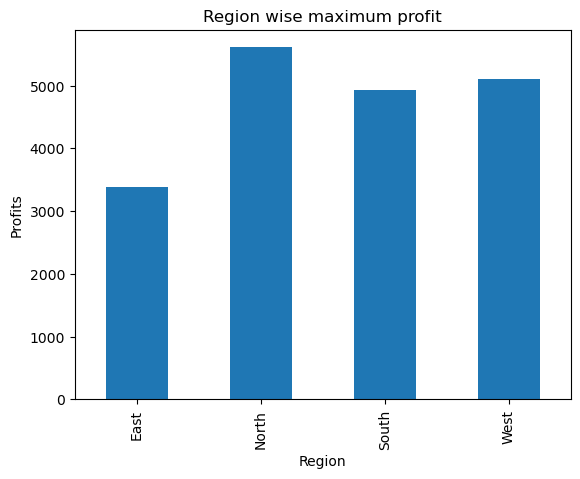

In [73]:
# Plotting the above maximum profit region wise in bar plot.

df.groupby('region')['profit'].max().plot(kind='bar')
plt.title('Region wise maximum profit')
plt.xlabel('Region')
plt.ylabel('Profits')
plt.show()

## 23. Create a pivot table with region as the index and sales as the values

In [75]:
# Let's create the pivot table using the 'df' dataframe which is a mandatory argument.
# The 'region' is used as an index and 'total_sales' is used as values argument.

pivot_table = pd.pivot_table(data=df, values='total_sales', index='region')
pivot_table

,total_sales
region,
East,5448.023333
North,5512.260000
South,4523.960000
West,5356.520000


## 24. Drop duplicate rows based on the product_id column

In [77]:
# We first check the columns having duplicate rows
df.duplicated().sum()

0

In [78]:
# Since there is no duplicate rows in the above step, we are skipping the step of dropping the duplicates.
# Since no duplicates, below code will not work.
#df.drop_duplicates(inplace= True)

## 25. Concatenate two DataFrames vertically

In [80]:
# We can concatenate the dataframes 'dat', 'data'.
# Note that the dataframes are passed in list as an argument.
concatenated_df = pd.concat([dat, data])
concatenated_df

,S.No,Name,Age,id,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
Fa,1.0,Arun,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ther,2.0,Kumar,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mo,3.0,Shanmuga,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ther,4.0,Priya,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fkid,5.0,Mithran,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skid,6.0,Tharika,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,-0.494483,1.889322,1.449536,1.298823,-0.447061,-0.668337,0.440829,0.163283,-1.445044
1,NaN,NaN,NaN,ID_2,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN
2,NaN,NaN,NaN,NaN,0.065086,NaN,-0.726306,0.184994,-1.424656,-0.554296,0.857514,-1.496475,1.272468
3,NaN,NaN,NaN,NaN,1.493361,0.431571,1.451377,0.002334,0.424719,-0.160556,NaN,0.041576,-1.125257


## 26. Replace all NaN values in a DataFrame with the mean of their respective columns

In [82]:
# Let's bring all the NaN value features first using list comprehension.
missing_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
missing_features

['rating', 'table_id', 'door_id', 'cloth_id', 'bag_id', 'light_id']

In [83]:
# Let's replace the NaN values of all features with their mean values.
for feature in missing_features:
    df[feature] = df[feature].fillna(df[feature].mean())

## 27. Find the average sales for each region and save the result as a new DataFrame

In [85]:
average_sales_df = pd.DataFrame(df.groupby('region')['total_sales'].mean())
average_sales_df

,total_sales
region,
East,5448.023333
North,5512.260000
South,4523.960000
West,5356.520000


## 28. Convert a column price from a string to a float data type

In [87]:
# Since the 'discounted_price' column is already in float64 dtype, we skip this process.
# Perhaps, the below code works if the 'discounted_price' is of str datatype.
#str_datatype = df['discounted_price'].astype(float64)

## 29. Extract all rows where the column status is either Shipped or Pending

In [89]:
df.shape

(22, 82)

In [90]:
# Since there is no status column we will first create a new column.
# We create the new status column with 5 values shipped, pending, delivered, returned, ordered.
status_values = ['shipped', 'pending', 'delivered', 'returned', 'ordered']
df['status'] = np.random.choice(status_values, size=len(df))
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,status
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,shipped
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,ordered
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,pending
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,delivered
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,pending


In [91]:
# Change the status column position from last to 13
status_position = list(df.columns)
status_position.insert(13, status_position.pop(-1))
df = df[status_position]

In [92]:
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142


In [93]:
filtered_status = df[df['status'].isin(['shipped', 'pending'])]
filtered_status

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142
5,ID_9,Name_48,North,Product_20,Accessories,5895.93,2024-12-23,28,2022-01-08,8370.32,4219.05,4151.27,42.1905,shipped,2.63000,164,332.52,119,340.28,461,290.02,428,594.86,274,627.52,129,954.62,199,331.29,100,668.17,74,161.97,347,580.35,122,235.54,8,912.59,307,452.10,309,455.52,298,231.54,342,596.83,346.0,872.37,213,583.70,474,939.07,151,502.36,81,227.35,425,760.73,263,244.84,150,685.04,387,359.96,91,782.43,24,865.89,298,659.42,288,567.36,388,1.020566,0.464753,-1.055531,-2.113006,-1.699353,1.302594,0.296111,0.491229,-0.071172
10,ID_16,Name_28,North,shiva,Furniture,8976.51,2024-08-29,63,2022-01-13,11234.85,5626.26,5608.59,56.2626,shipped,1.89000,409,612.46,423,679.52,309,964.85,439,899.99,8,287.94,398,83.43,195,412.87,44,182.11,335,673.33,219,463.78,116,193.89,245,625.13,468,331.82,268,503.32,474,75.30,457,616.80,283.0,422.21,452,915.80,334,892.49,4,355.44,128,941.62,36,328.94,44,568.15,103,359.53,333,968.48,39,227.61,135,351.68,376,265.84,89,192.44,69,1.148245,-0.173197,-0.217108,-0.724376,0.116675,-1.361814,-0.821678,0.397212,-1.022528
13,ID_23,Name_39,West,Product_6,Furniture,1723.54,2024-06-16,55,2022-01-15,1842.11,1020.95,821.16,10.2095,shipped,2.76000,353,547.12,163,694.77,97,400.21,383,162.31,50,677.68,411,35.28,36,818.12,279,429.19,259,417.48,118,330.82,345,309.80,139,726.13,197,474.52,274,761.97,172,767.10,173,433.92,484.0,984.38,261,855.44,116,97.47,357,634.47,422,145.27,336,178.72,93,274.83,300,380.73,380,948.13,64,614.50,59,300.32,423,852.40,345,541.97,144,-0.454210,-0.585397,0.656285,-0.285287,-0.055461,0.671082,1.712720,-0.527796,-2.103465
14,ID_24,Name_2,West,senathipathi,Electronics,7359.30,2024-12-16,61,2022-01-16,6454.29,4606.38,1847.91,46.0638,pending,4.43000,301,538.79,36,351.26,16,552.88,212,876.91,24,699.30,241,900.58,445,654.20,59,150.64,17,547.14,342,885.63,29,737.52,230,798.38,315,74.45,331,993.3

## 30. Add a column that contains the cumulative sum of the sales column

In [95]:
# Let's use a cumsum() method to find the cumulative sum of any column.
df['cumulative_sales'] = df['total_sales'].cumsum()
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54


## 31. Extract all rows where the column name contains the substring "John"

In [97]:
# Let's use str.contains() method to extract row values as 'John'
# Since we don't have any one under the substring 'John', it returned an empty dataframe
sub_string_john = df[df['product'].str.contains('John')]
sub_string_john

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales


## 32. Filter rows where the column quantity is a multiple of 5

In [99]:
quantity_of_five = df[df['quantity'] % 5 == 0]
quantity_of_five

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales
12,ID_22,Name_33,South,Product_18,Food,7143.55,2024-01-13,70,2022-01-15,6213.54,6364.83,-151.29,63.6483,returned,4.59,217,719.11,445,381.49,159,39.08,93,142.60,234,352.74,396,259.59,191,6.07,17,135.66,279,243.45,45,348.59,395,526.25,425,92.34,298,359.73,102,191.00,253,674.88,64,662.67,424.0,140.33,398,944.96,479,533.29,134,362.79,283,20.25,223,594.93,314,470.31,393,466.35,300,538.69,157,806.77,396,610.11,171,912.64,187,830.72,56,0.618473,0.205323,0.981171,-0.009808,-0.204346,-0.038332,0.483701,-0.435698,-1.947255,66650.62
13,ID_23,Name_39,West,Product_6,Furniture,1723.54,2024-06-16,55,2022-01-15,1842.11,1020.95,821.16,10.2095,shipped,2.76,353,547.12,163,694.77,97,400.21,383,162.31,50,677.68,411,35.28,36,818.12,279,429.19,259,417.48,118,330.82,345,309.80,139,726.13,197,474.52,274,761.97,172,767.10,173,433.92,484.0,984.38,261,855.44,116,97.47,357,634.47,422,145.27,336,178.72,93,274.83,300,380.73,380,948.13,64,614.50,59,300.32,423,852.40,345,541.97,144,-0.454210,-0.585397,0.656285,-0.285287,-0.055461,0.671082,1.712720,-0.527796,-2.103465,68374.16
20,ID_38,Name_11,South,Product_5,Clothing,8725.92,2024-08-09,95,2022-01-22,12189.27,7252.36,4936.91,72.5236,returned,1.50,464,590.89,94,514.67,82,329.88,425,58.80,28,575.50,357,623.44,343,660.66,124,570.72,115,424.61,279,315.13,167,526.34,451,534.74,422,272.36,269,967.16,282,444.64,478,983.30,403.0,762.05,421,802.14,423,348.69,409,345.83,113,706.29,3,22.27,106,572.17,465,287.88,419,719.81,44,700.75,294,947.90,85,861.87,8,489.54,175,-0.085693,1.382471,0.066477,0.132683,-1.497688,-1.210798,-0.693952,0.113077,1.202460,107200.46
21,ID_39,Name_45,East,senathipathi,Food,8640.46,2024-04-13,85,2022-01-22,7426.26,7730.60,-304.34,77.3060,pending,3.06,45,449.27,350,259.91,62,305.12,40,610.04,209,553.77,339,237.65,312,979.62,141,404.56,214,550.15,127,205.42,120,49.12,405,196.28,1,221.43,481,733.50,349,970.19,36,45.41,304.0,602.51,361,772.27,135,294.22,58,752.35,168,916.78,456,624.96,84,124.81,10,294.34,286,304.60,326,542.22,477,217.45,224,145.79,52,266.40,23,-2.372777,0.806191,-0.859219,-0.270037,1.314703,-1.517739,-0.401499,1.540615,-0.489415,115840.92


## 33. Count the number of rows in each category in the column product_type

In [101]:
# Let's use value_counts() to check the no.of rows in each category in product column.
# value_counts() displays the values from largest to lowest/
count_of_product_type = df['product'].value_counts()
count_of_product_type
# Below code also displays the no.of rows in each category. This displays the values in alphabetical order of category.
#count_of_product_type = df.groupby('product').size()
#count_of_product_type

product
senthalampoo    3
rama            2
Product_20      2
Product_6       2
senathipathi    2
Product_5       2
Arun            1
Product_8       1
Aran            1
shiva           1
Product_18      1
Product_10      1
Product_17      1
Product_4       1
Product_9       1
Name: count, dtype: int64

## 34. Find the correlation between numerical columns in a DataFrame

In [103]:
# Correlation can found in dataframe using dataframe.corr().
# Since we already have numerical_features, we put the dataframe around it and use .corr()
corr_matrix = df[numerical_features].corr()
corr_matrix

,total_sales,quantity,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
total_sales,1.000000,0.157955,0.929308,0.951348,0.659212,0.951348,-0.136552,0.149294,-0.061807,-0.033069,0.160085,-0.013554,0.151997,-0.021838,-0.028289,-0.335651,0.120201,0.021354,-0.012172,0.043236,-0.208594,-0.113133,-0.121833,-0.172388,-0.266627,0.002991,0.069019,-0.349819,0.268575,0.129884,-0.111466,0.082046,-0.209690,0.118721,0.176400,0.197903,0.075491,0.332890,0.030864,-0.144295,0.034358,0.011438,0.125217,0.130248,0.198212,-0.034970,0.034801,-0.107666,-0.065911,-0.075013,-0.079012,0.050298,0.577011,-0.094954,-0.290152,-0.217421,-0.121982,-0.192963,-0.042363,0.137915,0.095829,-0.002941,0.007859,-0.155244,-0.076896,0.009993,-0.420067,0.070895,-0.234610,-0.010097,0.313443,-0.173933,-0.075707,-0.136557,0.313699
quantity,0.157955,1.000000,0.166113,0.255781,0.025586,0.255781,0.159244,0.209728,-0.040477,-0.279845,-0.028903,-0.180690,0.224020,-0.026043,-0.118429,-0.184117,0.001940,0.261095,-0.012332,0.181417,0.116914,-0.143340,-0.171603,0.135360,-0.271898,-0.433654,-0.183567,0.040443,-0.108384,0.391434,0.108092,0.138778,-0.353606,0.420712,0.169001,-0.204769,0.056051,-0.042881,0.054193,0.034392,-0.140730,0.335281,-0.041943,0.073295,-0.432758,0.008950,0.135409,-0.161870,0.401599,0.164187,-0.303575,0.048264,-0.033751,0.095926,0.327392,0.204250,0.198077,0.071273,0.446830,0.178520,-0.015307,0.017438,-0.042517,-0.115835,0.053276,-0.424717,0.013524,0.137266,-0.234861,-0.047054,-0.093160,-0.346867,-0.255431,-0.080357,0.111435
revenue,0.929308,0.166113,1.000000,0.881981,0.861872,0.881981,-0.256813,0.320054,-0.110669,-0.066269,0.236887,0.163409,0.280515,0.066215,-0.046093,-0.325977,0.087217,0.008620,0.094949,0.070254,-0.317056,-0.085186,-0.042320,-0.137623,-0.234592,0.120007,0.060320,-0.373387,0.321295,0.086875,0.070789,0.170267,-0.271642,0.073886,0.236394,0.222605,0.024591,0.476837,0.135708,-0.047557,0.068312,0.046301,0.021814,0.187250,0.176131,0.114757,-0.079439,-0.245976,-0.040550,-0.124360,-0.154885,0.047125,0.568671,-0.064464,-0.196282,-0.095073,0.001117,-0.284643,0.111082,-0.027448,0.219242,-0.012417,0.146433,-0.107025,-0.186454,0.112332,-0.369747,0.044381,-0.274063,-0.119534,0.152605,-0.196919,-0.084149,-0.146287,0.443006
cost,0.951348,0.255781,0.881981,1.000000,0.521154,1.000000,-0.062410,0.029466,-0.079597,0.053341,0.079690,-0.048612,0.076247,-0.010716,-0.111930,-0.304908,0.103800,0.040243,0.025000,0.075935,-0.218082,-0.160152,-0.140232,-0.139782,-0.206188,-0.120123,-0.064586,-0.331264,0.192057,0.262457,-0.118184,0.063887,-0.281713,0.092338,0.154998,0.242073,0.137619,0.268040,-0.028434,0.002617,-0.084174,0.141114,0.157844,0.182271,0.072369,-0.054115,0.095207,-0.166848,-0.059390,-0.032460,-0.079370,0.135270,0.400427,-0.099892,-0.233539,-0.084460,-0.106893,-0.192665,0.141587,0.280025,0.197714,-0.073461,0.097036,-0.220101,-0.147926,-0.104520,-0.454334,0.145306,-0.262581,-0.035929,0.268722,-0.228174,-0.079368,-0.111727,0.314529
profit,0.659212,0.025586,0.861872,0.521154,1.000000,0.521154,-0.397913,0.547889,-0.114763,-0.177406,0.343235,0.348231,0.425946,0.131442,0.036971,-0.262224,0.046249,-0.027693,0.145045,0.045515,-0.339499,0.018066,0.074259,-0.098812,-0.202960,0.346583,0.178733,-0.319721,0.375180,-0.125093,0.255366,0.239596,-0.188787,0.034441,0.261307,0.142639,-0.103554,0.575093,0.276354,-0.088939,0.214284,-0.067997,-0.130344,0.142964,0.241088,0.266048,-0.246306,-0.265909,-0.009527,-0.190278,-0.195081,-0.060217,0.598943,-0.009252,-0.104153,-0.081286,0.117045,-0.308151,0.048806,-0.351028,

<Axes: >

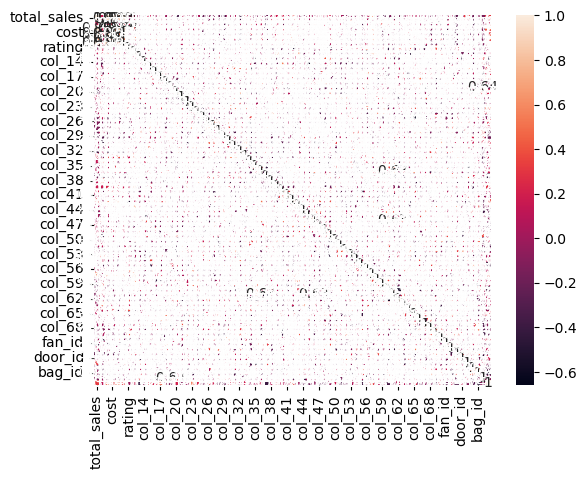

In [104]:
# We can also display the correlation using heatmap from seaborn library.
sns.heatmap(df[numerical_features].corr(), annot=True)

## 35. Convert the order_date column to a datetime object

In [106]:
# Before changing the datatype, let's check the dtypes first.
col_types = df.dtypes.to_dict()
col_types
# We can also check the datatypes of all columns as per below
# df.dtypes

{'id': dtype('O'),
 'name': dtype('O'),
 'region': dtype('O'),
 'product': dtype('O'),
 'category': dtype('O'),
 'total_sales': dtype('float64'),
 'order_date': dtype('<M8[ns]'),
 'quantity': dtype('int64'),
 'date': dtype('O'),
 'revenue': dtype('float64'),
 'cost': dtype('float64'),
 'profit': dtype('float64'),
 'discounted_price': dtype('float64'),
 'status': dtype('O'),
 'rating': dtype('float64'),
 'col_12': dtype('int64'),
 'col_13': dtype('float64'),
 'col_14': dtype('int64'),
 'col_15': dtype('float64'),
 'col_16': dtype('int64'),
 'col_17': dtype('float64'),
 'col_18': dtype('int64'),
 'col_19': dtype('float64'),
 'col_20': dtype('int64'),
 'col_21': dtype('float64'),
 'col_22': dtype('int64'),
 'col_23': dtype('float64'),
 'col_24': dtype('int64'),
 'col_25': dtype('float64'),
 'col_26': dtype('int64'),
 'col_27': dtype('float64'),
 'col_28': dtype('int64'),
 'col_29': dtype('float64'),
 'col_30': dtype('int64'),
 'col_31': dtype('float64'),
 'col_32': dtype('int64'),
 'col_3

In [107]:
# Now we will change the datatype of 'order_date' column from '<M8[ns]' to datetime
type_change = pd.to_datetime(df['order_date'])
df.info()
# We can also below code to change it to datetime datatype. But this is not the best practice.
#type_change = df['order_date'].astype('datetime64[ns]')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                22 non-null     object        
 1   name              22 non-null     object        
 2   region            22 non-null     object        
 3   product           22 non-null     object        
 4   category          22 non-null     object        
 5   total_sales       22 non-null     float64       
 6   order_date        22 non-null     datetime64[ns]
 7   quantity          22 non-null     int64         
 8   date              22 non-null     object        
 9   revenue           22 non-null     float64       
 10  cost              22 non-null     float64       
 11  profit            22 non-null     float64       
 12  discounted_price  22 non-null     float64       
 13  status            22 non-null     object        
 14  rating            22 non-nul

## 36. Slice the first 5 rows of the DataFrame and reset their index

In [109]:
# Slice the first 5 rows of the DataFrame and reset their index
sliced_dataframe = df.iloc[:5].reset_index(drop=True)
sliced_dataframe

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54


## 37. Multiply all values in the column quantity by 2

In [111]:
multiply_by_two = df['quantity'] * 2

In [112]:
multiply_by_two

0     192
1      56
2      38
3      28
4      46
5      56
6     114
7     106
8     152
9      16
10    126
11     96
12    140
13    110
14    122
15    176
16     94
17    122
18      6
19    156
20    190
21    170
Name: quantity, dtype: int64

## 38. Check if any column in the DataFrame has duplicate values

In [114]:
# To just check the dataframe is duplicated or not, below code will work.
# sum() will give the output in integer. If except '0' any number is displayed, it means the duplicates are there
df.duplicated().sum()

0

## 39. Export the DataFrame to an Excel file with the name data.xlsx

In [116]:
# Let's export the dataframe to an excel.
df.to_excel(r'E:\Study\Projects\EDA\data.xlsx')

## 40. Remove all columns with more than 50% missing values

In [118]:
# Below is the code for removing all columns greater than 50% of missing values.
# Since we don't have any missing value greater than 50%, it returned an empty list.
half_missing_values = [feature for feature in df.columns if df[feature].isnull().mean() > 0.50]
half_missing_values

[]

## Moderate type of questions

## 1.Find the top 3 products with the highest sales in each region

In [121]:
# Below is the code for finding the top 3 products with highest sales in each region.
# Let's group by 'region' and apply an arbitrary function for the top 3 product sales
top_three_products = df.groupby('region').apply(lambda x: x.nlargest(3, 'total_sales').reset_index(drop=True))
top_three_products
# Below code also provides the same result. But we use sort_values()
#df_sorted = df.sort_values(['region', 'total_sales'], ascending=[True, False])
#final_value = df_sorted.groupby('region').head(3)
#final_value

C:\Users\Arun Kumar\AppData\Local\Temp\ipykernel_17492\2605280122.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_three_products = df.groupby('region').apply(lambda x: x.nlargest(3, 'total_sales').reset_index(drop=True))


id     name region       product     category  total_sales  \
region                                                                    
East   0  ID_39  Name_45   East  senathipathi         Food      8640.46   
       1   ID_2   Name_8   East          Arun     Clothing      6930.53   
       2  ID_34  Name_38   East     Product_9    Furniture      5548.42   
North  0  ID_16  Name_28  North         shiva    Furniture      8976.51   
       1  ID_29  Name_45  North    Product_17  Electronics      7102.06   
       2   ID_9  Name_48  North    Product_20  Accessories      5895.93   
South  0  ID_38  Name_11  South     Product_5     Clothing      8725.92   
       1  ID_22  Name_33  South    Product_18         Food      7143.55   
       2   ID_8   Name_9  South          rama     Clothing      1879.74   
West   0  ID_18   Name_2   West          rama  Accessories      8837.23   
       1  ID_24   Name_2   West  senathipathi  Electronics      7359.30   
       2  ID_30  Name_35   West     Product_4  Accessories      7296.05   

         order_date  quantity        date   revenue     cost   profit  \
region                                                                  
East   0 2024-04-13        85  2022-01-22   7426.26  7730.60  -304.34   
       1 2024-08-10        96  2022-01-02   9501.19  6113.22  3387.97   
       2 2024-04-16         3  2022-01-20   4475.23  3848.73   626.50   
North  0 2024-08-29        63  2022-01-13  11234.85  5626.26  5608.59   
       1 2024-10-02        47  2022-01-19   9510.24  4715.56  4794.68   
       2 2024-12-23        28  2022-01-08   8370.32  4219.05  4151.27   
South  0 2024-08-09        95  2022-01-22  12189.27  7252.36  4936.91   
       1 2024-01-13        70  2022-01-15   6213.54  6364.83  -151.29   
       2 2024-09-04        23  2022-01-07   1911.91  1491.73   420.18   
West   0 2024-01-24        48  2022-01-14  11550.39  6452.04  5098.35   
       1 2024-12-16        61  2022-01-16   6454.29  4606.38  1847.91   
       2 2024-11-24        61  2022-01-19   7203.82  3880.59  3323.23   

          discounted_price     status   rating  col_12  col_13  col_14  \
region                                                                   
East   0           77.3060    pending  3.06000      45  449.27     350   
       1           61.1322    shipped  2.85875     315  800.21     158   
       2           38.4873  delivered  1.39000      20  914.11     325   
North  0           56.2626    shipped  1.89000     409  612.46     423   
       1           47.1556    pending  2.03000     498  627.04     247   
       2           42.1905    shipped  2.63000     164  332.52     119   
South  0           72.5236   returned  1.50000     464  590.89      94   
       1           63.6483   returned  4.59000     217  719.11     445   
       2           14.9173    pending  2.85875     256  211.06     450   
West   0           64.5204  delivered  2.85875     386  434.94     424   
       1           46.0638    pending  4.43000     301  538.79      36   
       2           38.8059    pending  2.29000     351  791.84      18   

          col_15  col_16  col_17  col_18  col_19  col_20  col_21  col_22  \
region                                                                     
East   0  259.91      62  305.12      40  610.04     209  553.77     339   
       1  618.55     327  733.08     284  175.23      48  793.92     133   
       2  314.39     120  539.62     348  266.26     170  648.10      24   
North  0  679.52     309  964.85     439  899.99       8  287.94     398   
       1  832.52     403  833.56       8  156.21     269  969.20     378   
       2  340.28     461  290.02     428  594.86     274  627.52     129   
South  0  514.67      82  329.88     425   58.80      28  575.50     357   
       1  381.49     159   39.08      93  142.60     234  352.74     396   
       2   90.30     293   27.95      54  326.06     247  385.07     285   
West   0  687.45     323  887.63      92   10.95     409   12.85  

## 2.Create a new column called sales_category that labels sales values as "Low", "Medium", or "High" based on thresholds

In [123]:
# The expectation is 'total_sales' value from 0 to 3999 must be labelled as low
# and from 3999 to 6999 must be labelled as medium
# and above 7000 must be labelled as high.
# To stamp the 'total_sales' values with some labels based on threshold, we use cut() from pandas.

# bins - an integer values that segerate the entire 'sales_category' values based on label types.
# labels - a string that stamps the 'sales_category' values based on bins

bin_values = [0, 4000, 7000, 9000]
category_labels = 'Low Medium High'.split()
df['sales_category'] = pd.cut(df['total_sales'], bins = bin_values, labels = category_labels, right = False)

In [124]:
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53,Medium
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93,Medium
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29,Low
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80,Medium
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54,Low


## 3.Fill missing values in the price column using the median of the column

In [126]:
# Since we don't have price column in our dataframe, let's first create it.
# We create the price column with some random numbers from 1 to 100 for the whole dataframe.
df['price'] = np.random.randint(1, 100, len(df))
# We now insert the NaN values randomly for the given size(9 rows will have NaN values)
df.loc[np.random.choice(df.index, size=9, replace=False), 'price'] = np.nan

In [127]:
df['price'].isnull().sum()

9

In [128]:
df.head()

,id,name,region,product,category,total_sales,order_date,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,price
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53,Medium,NaN
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93,Medium,28.0
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29,Low,NaN
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80,Medium,64.0
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54,Low,60.0


In [129]:
# We will first bring the price column to the right and then fill missing values with their median

price_position = list(df.columns)
price_position.insert(7, price_position.pop(-1))
df=df[price_position]

# Let's now fill missing values with median()
#df['price'].fillna(df['price'].median(), inplace=True)
df.fillna({'price': df['price'].median()}, inplace=True)

In [130]:
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,42.0,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53,Medium
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28.0,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93,Medium
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,42.0,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29,Low
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,64.0,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80,Medium
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,60.0,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54,Low


## 4.Write a function to calculate the profit margin and apply it to the DataFrame

In [132]:
# Let's first see the profit margin formula
# profit margin = (profit/sales) * 100
def calculate_profit_margin(profit, sales):
    return (profit/sales) * 100

# Let's now apply the calculate_profit_margin function to the new column 'profit_margin'
# Note, we use the arbitrary function lambda and use the same variable 'x' for passing the arguments.
df['profit_margin'] = df.apply(lambda x:calculate_profit_margin(x['profit'], x['total_sales']), axis=1)

In [133]:
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin
0,ID_2,Name_8,East,Arun,Clothing,6930.53,2024-08-10,42.0,96,2022-01-02,9501.19,6113.22,3387.97,61.1322,shipped,2.85875,315,800.21,158,618.55,327,733.08,284,175.23,48,793.92,133,935.30,281,99.59,429,554.37,476,606.33,387,199.22,17,783.83,416,870.71,216,544.54,198,819.19,106,523.37,60,631.80,482.0,53.94,207,191.55,315,168.22,309,914.20,149,974.55,450,682.02,339,81.20,252,897.70,434,450.48,54,914.17,476,699.77,376,877.58,255,186.32,177,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,-0.254920,6930.53,Medium,48.884717
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28.0,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93,Medium,73.418817
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,42.0,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29,Low,2.716605
3,ID_7,Name_15,East,Aran,Food,5056.51,2024-05-06,64.0,14,2022-01-07,5043.52,3803.15,1240.37,38.0315,delivered,3.94000,17,501.08,332,892.52,351,584.28,482,269.32,222,82.84,396,886.41,41,287.39,405,667.23,294,996.31,389,684.15,467,608.35,27,5.97,185,802.98,21,516.65,352,807.25,252,516.41,473.0,475.81,166,986.49,305,736.22,100,254.24,343,290.98,488,507.55,347,331.47,105,229.24,16,108.36,429,348.19,461,685.50,374,186.60,86,584.01,15,0.927662,2.006128,0.851138,1.073249,1.663104,0.294839,-0.987338,-0.880878,0.513378,19478.80,Medium,24.530160
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,60.0,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54,Low,22.353091


## 5.Extract rows where the order_date falls within a specific date range

In [135]:
# Let's use between() and specify the dates in string format. (i.e) in quotes.
# Remember, do not use isin() and use range() for dates. As range() is for integers and cannot be used for datetime object.
order_date_range = df[df['order_date'].between('2024-8-19' , '2024-12-17')]
order_date_range

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin
1,ID_5,Name_18,West,Product_8,Food,6496.40,2024-11-26,28.0,28,2022-01-04,9487.01,4717.43,4769.58,47.1743,ordered,2.85875,348,482.80,118,381.16,482,997.24,192,901.35,129,217.20,107,783.18,237,4.28,231,542.04,379,988.02,479,540.29,95,778.25,71,710.36,325,70.22,101,492.71,180,701.41,180,522.77,396.0,963.98,260,301.10,147,252.35,249,45.91,180,815.45,55,842.73,199,541.08,69,218.43,108,993.55,321,925.93,57,637.23,463,625.65,239,79.24,250,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,13426.93,Medium,73.418817
2,ID_6,Name_16,North,senthalampoo,Food,995.36,2024-12-02,42.0,19,2022-01-05,921.99,894.95,27.04,8.9495,pending,2.88000,252,824.32,301,312.35,324,292.97,90,264.56,118,742.90,371,847.20,457,685.77,11,899.22,57,897.67,408,731.16,202,713.50,451,536.88,7,926.67,247,497.69,89,162.54,63,376.90,440.0,430.91,113,754.32,330,305.66,282,866.40,462,944.35,5,828.14,98,78.83,131,914.44,389,258.21,46,460.81,444,18.58,122,840.16,338,675.03,188,-0.458374,-0.445329,1.173618,-0.184508,-0.982248,0.443307,-0.155500,0.447833,-1.532038,14422.29,Low,2.716605
4,ID_8,Name_9,South,rama,Clothing,1879.74,2024-09-04,60.0,23,2022-01-07,1911.91,1491.73,420.18,14.9173,pending,2.85875,256,211.06,450,90.30,293,27.95,54,326.06,247,385.07,285,263.49,134,788.78,300,131.76,13,503.87,333,66.81,34,222.80,459,899.12,193,129.93,219,663.22,479,663.56,122,923.58,439.0,286.94,436,119.46,115,287.93,458,410.91,184,887.92,26,538.97,188,275.86,374,94.69,360,838.15,143,197.07,202,115.71,31,472.55,103,458.80,440,0.489244,-0.991490,2.101441,1.979938,-1.786948,0.274825,0.728047,-0.081136,-0.162142,21358.54,Low,22.353091
8,ID_14,Name_6,South,senthalampoo,Electronics,346.63,2024-09-26,42.0,76,2022-01-11,380.76,264.71,116.05,2.6471,delivered,1.40000,243,889.59,330,613.70,104,394.50,107,680.47,484,376.84,200,579.57,484,299.32,310,926.17,439,971.08,267,498.67,446,103.87,67,456.55,387,611.22,437,134.75,114,474.88,211,594.26,430.0,256.59,379,400.02,174,903.33,137,235.41,42,486.82,362,553.55,50,183.11,487,825.82,432,892.37,276,879.59,128,592.18,73,498.58,42,350.19,37,1.377505,0.252546,-0.504584,-0.655532,-0.613716,1.087931,-0.447010,1.731288,-0.754150,37101.89,Low,33.479503
10,ID_16,Name_28,North,shiva,Furniture,8976.51,2024-08-29,42.0,63,2022-01-13,11234.85,5626.26,5608.59,56.2626,shipped,1.89000,409,612.46,423,679.52,309,964.85,439,899.99,8,287.94,398,83.43,195,412.87,44,182.11,335,673.33,219,463.78,116,193.89,245,625.13,468,331.82,268,503.32,474,75.30,457,616.80,283.0,422.21,452,915.80,334,892.49,4,355.44,128,941.62,36,328.94,44,568.15,103,359.53,333,968.48,39,227.61,135,351.68,376,265.84,89,192.44,69,1.148245,-0.173197,-0.217108,-0.724376,0.116675,-1.361814,-0.821678,0.397212,-1.022528,50669.84,High,62.480741
14,ID_24,Name_2,West,senathipathi,Electronics,7359.30,2024-12-16,42.0,61,2022-01-16,6454.29,4606.38,1847.91,46.0638,pending,4.43000,301,538.79,36,351.26,16,552.88,212,876.91,24,699.30,241,900.58,445,654.20,59,150.64,17,547.14,342,885.63,29,737.52,230,798.38,315,74.45,331,993.37,23,138.44,45,534.61,28.0,544.76,133,80.69,44,394.15,228,676.55,478,894.35,169,609.21,161,670.80,397,682.27,79,505.74,116,280.15,491,56.23,247,80.38,148,629.08,42,-0.482974,-1.244094,0.907765,0.702339,-0.151393,1.485510,-0.619358,0.417685,0.275160,75733.46,High,25.109861
16,ID_29,Name_45,North,Product_17,Electronics,7102.0

## 6.Write a script to normalize all numerical columns in the DataFrame to a scale of 0 to 1

In [137]:
# To normalize the Dataframe between 0 and 1 we need to use MinMaxScaler class of preprocessing module from sklearn library
# Note, StandardScaler() will scale between -1 and 0.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [138]:
df[numerical_features]

,total_sales,quantity,revenue,cost,profit,discounted_price,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id
0,0.762919,1.000000,0.772361,0.783364,0.624447,0.783364,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602
1,0.712614,0.268817,0.771160,0.596408,0.858106,0.596408,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,0.727273,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069
2,0.075173,0.172043,0.045834,0.084416,0.056043,0.084416,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,0.032828,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329
3,0.545764,0.118280,0.394864,0.473948,0.261243,0.473948,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,1.000000,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689
4,0.177651,0.215054,0.129665,0.164350,0.122531,0.164350,0.458984,0.497925,0.000000,0.913319,0.024229,0.585624,0.018271,0.094845,0.353897,0.502101,0.389209,0.674419,0.240916,0.239130,0.804335,0.609705,0.020637,0.000000,0.469691,0.632967,0.000000,0.039911,0.204872,0.918534,0.985143,0.393443,0.115432,0.430435,0.666626,0.989316,0.657355,0.194570,0.936325,0.901316,0.250419,0.875306,0.078696,0.159193,0.217671,1.000000,0.421256,0.336343,0.909221,0.047423,0.629769,0.436364,0.309241,0.763103,0.091785,0.822967,0.841335,0.277778,0.142417,0.410204,0.104517,0.000000,0.471211,0.196687,0.412790,0.965909,0.733281,0.077719,1.000000,1.000000,0.000000,0.650894,0.695031,0.235044,0.500523
5,0.643033,0.268817,0.676593,0.529654,0.753537,0.529654,0.3875

## 7.Merge two DataFrames on multiple columns (id and region)

In [140]:
# Since we don't have region column in 'data' Dataframe, let's first create it.
region_values = 'southern eastern western northern zonal divisional'.split()
data['region'] = np.random.choice(region_values, size = len(data))

# Now, let's merge both 'df' and 'data' Dataframe on multiple columns (id & region)
# Since there are no common value in both Dataframe, the resultant will be an empty Dataframe.
merged_df = pd.merge(df, data, on=['id', 'region'], how='inner')

In [141]:
# merged_df will be empty since no value in common in both Dataframe
merged_df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id_x,table_id_x,board_id_x,door_id_x,cloth_id_x,book_id_x,bag_id_x,doll_id_x,light_id_x,cumulative_sales,sales_category,profit_margin,fan_id_y,table_id_y,board_id_y,door_id_y,cloth_id_y,book_id_y,bag_id_y,doll_id_y,light_id_y


In [142]:
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717
1,ID_5,Name_18,West,Product_8,Food,0.712614,2024-11-26,28.0,0.268817,2022-01-04,0.771160,0.596408,0.858106,0.596408,ordered,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,0.727273,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069,13426.93,Medium,73.418817
2,ID_6,Name_16,North,senthalampoo,Food,0.075173,2024-12-02,42.0,0.172043,2022-01-05,0.045834,0.084416,0.056043,0.084416,pending,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,0.032828,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329,14422.29,Low,2.716605
3,ID_7,Name_15,East,Aran,Food,0.545764,2024-05-06,64.0,0.118280,2022-01-07,0.394864,0.473948,0.261243,0.473948,delivered,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,1.000000,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689,19478.80,Medium,24.530160
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,60.0,0.215054,2022-01-07,0.129665,0.164350,0.122531,0.164350,pending,0.458984,0.497925,0.000000,0.913319,0.024229,0.585624,0.018271,0.094845,0.353897,0.502101,0.389209,0.674419,0.240916,0.239130,0.804335,0.60

## 8.Create a multi-index DataFrame and access specific rows using multi-level indexing

In [144]:
# multi indexing is possible in pandas using 'pd.MultiIndex' class and 'from_tuples()'.
# We need to pass a list of tuples and names (names of indexes)

index_dataframe = pd.MultiIndex.from_tuples([('India', 'Tamil Nadu'),
                                             ('India', 'Kerala'),
                                             ('Canada', 'Toronto'),
                                            ('Canada', 'Montreal'),
                                            ('America', 'San Francisco'),
                                            ('America', 'Chicago')],names=('Country', 'State'))

# Now we create a dataframe and pass the index argument as the variable name created above.
# randint(20, 2980) denotes a random number starting from 20 to 2980 to be filled in the dataframe
# size(6,4) denotes 6 rows and 4 columns.
multi_index = pd.DataFrame(np.random.randint(20, 2980, size=(6,4)),
                           index=index_dataframe,
                           columns='Purchase Sales Profit Margin'.split())

In [145]:
multi_index.head(40)

Purchase  Sales  Profit  Margin
Country State                                         
India   Tamil Nadu          351   1757     512    2498
        Kerala             1680   2705    2037    1659
Canada  Toronto            1250    980    2208    2408
        Montreal           2686    601    2400    2421
America San Francisco      2489     62    2159    1764
        Chicago            1365   1195    2584    1798

## 9.Create a histogram for the column quantity and find the most frequent bin

Most Frequent Bin Range: (0.2, 0.30000000000000004), Count: 3.0


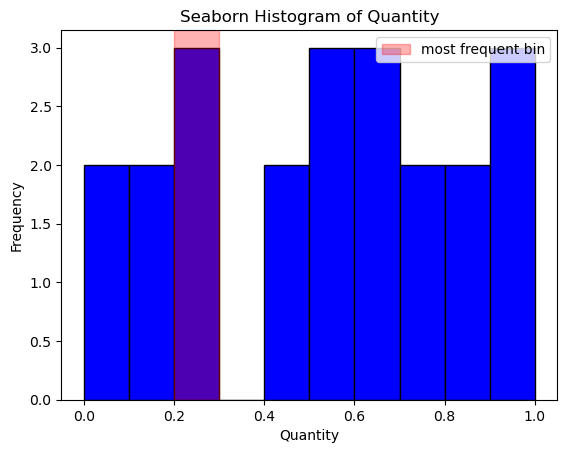

In [147]:
# We can create histogram using plt.hist(), sns.histplot(), np.histogram(). But we are using plt.hist() here

#plt.hist() returns three outputs. We unpack them using the variables 'counts, bin_edges, patches.

#counts - It is an array that gives the frequency (count of values) of the each bin (here [2. 2. 3. 0. 2. 3. 3. 2. 2. 3.])

#bin_edges - It is an array that gives the bin edges or the value of 
#each bin in x-axis (here [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ])

#patches - This is a list of patch objects. here(region xy=(2,0), width=19.8, height=2, angle=0)
counts, bin_edges, patches = plt.hist(df['quantity'], bins=10, color='blue', edgecolor='black')

#np.argmax() gives the indices of the value of the highest bin along the axis.(here 2 is the bin with highest frequency)
max_bin_index = np.argmax(counts)

#Now we need to get the starting point and end point of the largest bin with highest frequency
most_frequent_bin = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

#plt.axvspan() Add a vertical span (rectangle) across the Axes. 
#plt.axvspan() highlights the most frequent bin in the histogram using a shaded region.
plt.axvspan(most_frequent_bin[0], most_frequent_bin[1], color='red', alpha=0.3, label='most frequent bin')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Seaborn Histogram of Quantity')
plt.legend()
print(f"Most Frequent Bin Range: {most_frequent_bin}, Count: {counts[max_bin_index]}")
plt.show()

In [148]:
# We can use try exception to throw the error
#try:
#    counts, bins, patches = plt.hist(df['quantity'], bins=10)
#except Exception as e:
#    print(f"Unpacking Error: {e}")

## 10.Extract rows where the column description has a specific word, ignoring case sensitivity

In [150]:
#df.loc[4, 'category']
df[df['category'].str.contains('in', case=False, na=False)]


,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,60.0,0.215054,2022-01-07,0.129665,0.164350,0.122531,0.164350,pending,0.458984,0.497925,0.000000,0.913319,0.024229,0.585624,0.018271,0.094845,0.353897,0.502101,0.389209,0.674419,0.240916,0.239130,0.804335,0.609705,0.020637,0.000000,0.469691,0.632967,0.000000,0.039911,0.204872,0.918534,0.985143,0.393443,0.115432,0.430435,0.666626,0.989316,0.657355,0.194570,0.936325,0.901316,0.250419,0.875306,0.078696,0.159193,0.217671,1.000000,0.421256,0.336343,0.909221,0.047423,0.629769,0.436364,0.309241,0.763103,0.091785,0.822967,0.841335,0.277778,0.142417,0.410204,0.104517,0.000000,0.471211,0.196687,0.412790,0.965909,0.733281,0.077719,1.000000,1.000000,0.000000,0.650894,0.695031,0.235044,0.500523,21358.54,Low,22.353091
20,ID_38,Name_11,South,Product_5,Clothing,0.970963,2024-08-09,40.0,0.989247,2022-01-22,1.000000,0.935943,0.886405,0.935943,returned,0.034375,0.929461,0.485362,0.160677,0.540407,0.139535,0.324076,0.859794,0.053740,0.042017,0.588331,0.860465,0.620907,0.693478,0.672976,0.238397,0.561795,0.220302,0.384335,0.514286,0.272990,0.334812,0.562925,0.902240,0.583232,0.862705,0.272612,0.539130,0.973534,0.568376,0.412721,1.000000,1.000000,0.822368,0.761049,0.838631,0.804110,0.849776,0.287112,0.892070,0.351021,0.176072,0.718893,0.000000,0.000000,0.187879,0.774304,0.953878,0.304119,0.964115,0.720508,0.027778,0.735051,0.597959,1.000000,0.125000,0.938997,0.000000,0.446221,0.363636,0.585976,0.808119,0.374804,0.557613,0.081597,0.222509,0.254616,0.292124,0.852352,107200.46,High,56.577530


## 11.Write a script to calculate the percentage of missing values for each column

In [152]:
null_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for fea in null_features:
    print(f'{fea}: {np.round(df[fea].isnull().mean() * 100, 4)} % of missing values')

In [153]:
def missing_value_percent(df):
    null_features = df.isnull().mean() * 100
    missing_df = pd.DataFrame({'columns': df.columns, 'missing_features': null_features})
    missing_df = missing_df[missing_df['missing_features'] > 0]
    return missing_df.sort_values(by='missing_features', ascending = False)

In [154]:
missing_value_percent(data)

,columns,missing_features
id,id,45.0
table_id,table_id,7.5
cloth_id,cloth_id,7.5
bag_id,bag_id,5.0
board_id,board_id,2.5
door_id,door_id,2.5
light_id,light_id,2.5


## 12.Create a DataFrame showing the rank of sales within each region

In [156]:
#df.groupby('region').apply(lambda x:x.assign(sales_rank=x['total_sales'].rank(ascending=False, method='dense')))
df['sales_rank'] = df.groupby('region')['total_sales'].rank(ascending=False, method='dense')
df

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717,2.0
1,ID_5,Name_18,West,Product_8,Food,0.712614,2024-11-26,28.0,0.268817,2022-01-04,0.771160,0.596408,0.858106,0.596408,ordered,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,0.727273,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069,13426.93,Medium,73.418817,4.0
2,ID_6,Name_16,North,senthalampoo,Food,0.075173,2024-12-02,42.0,0.172043,2022-01-05,0.045834,0.084416,0.056043,0.084416,pending,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,0.032828,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329,14422.29,Low,2.716605,5.0
3,ID_7,Name_15,East,Aran,Food,0.545764,2024-05-06,64.0,0.118280,2022-01-07,0.394864,0.473948,0.261243,0.473948,delivered,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,1.000000,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689,19478.80,Medium,24.530160,5.0
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,60.0,0.215054,2022-01-07,0.129665,0.164350,0.122531,0.164350,pending,0.458984,0.497925,0.000000,0.913319,0.024229,0.585624,0.018271,0.094845,0.353897,0.502101,0.389209,0.674419,0.24

In [157]:
# To list out all pandas Dataframe methods excluding attributes.
# There are about 390 methods only excluding attributes in total.
methods = [method for method in dir(df) if callable(getattr(df, method))]
methods_df = pd.DataFrame({'Formattable_methods':methods})
pd.set_option('display.max_rows', None)
methods_df

C:\Users\Arun Kumar\AppData\Local\Temp\ipykernel_17492\775563796.py:3: DeprecationWarning: DataFrame._data is deprecated and will be removed in a future version. Use public APIs instead.
  methods = [method for method in dir(df) if callable(getattr(df, method))]


,Formattable_methods
0,__abs__
1,__add__
2,__and__
3,__array__
4,__array_ufunc__
5,__arrow_c_stream__
6,__bool__
7,__class__
8,__contains__
9,__copy__


In [158]:
# To list out all pandas Dataframe methods including attributes.
# There are about 526 methods including attributes and methods.
df_methods = dir(df)
listed_df = pd.DataFrame({'All Methods including attributes':df_methods})
pd.set_option('display.max_rows', None)
listed_df

,All Methods including attributes
0,T
1,_AXIS_LEN
2,_AXIS_ORDERS
3,_AXIS_TO_AXIS_NUMBER
4,_HANDLED_TYPES
5,__abs__
6,__add__
7,__and__
8,__annotations__
9,__array__


In [159]:
# To check the structrure of methods like rank or to find the parameters.
# This will help when intellisense not works sometime and difficult to find the parameters.
help(pd.DataFrame.rank)
# You can also give in below format.
# help(df.rank)

Help on function rank in module pandas.core.generic:

rank(self, axis: 'Axis' = 0, method: "Literal['average', 'min', 'max', 'first', 'dense']" = 'average', numeric_only: 'bool_t' = False, na_option: "Literal['keep', 'top', 'bottom']" = 'keep', ascending: 'bool_t' = True, pct: 'bool_t' = False) -> 'Self'
    Compute numerical data ranks (1 through n) along axis.

    By default, equal values are assigned a rank that is the average of the
    ranks of those values.

    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Index to direct ranking.
        For `Series` this parameter is unused and defaults to 0.
    method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
        How to rank the group of records that have the same value (i.e. ties):

        * average: average rank of the group
        * min: lowest rank in the group
        * max: highest rank in the group
        * first: ranks assigned in order they appear in the array
 

In [160]:
# Another way to check the structure of a method like rank.
# This way works only when we are working in environments like jupyter notebook.
pd.DataFrame.rank?
# Below format also works
#df.rank?

Signature:
pd.DataFrame.rank(
    self,
    axis: 'Axis' = 0,
    method: "Literal['average', 'min', 'max', 'first', 'dense']" = 'average',
    numeric_only: 'bool_t' = False,
    na_option: "Literal['keep', 'top', 'bottom']" = 'keep',
    ascending: 'bool_t' = True,
    pct: 'bool_t' = False,
) -> 'Self'
Docstring:
Compute numerical data ranks (1 through n) along axis.

By default, equal values are assigned a rank that is the average of the
ranks of those values.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Index to direct ranking.
    For `Series` this parameter is unused and defaults to 0.
method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
    How to rank the group of records that have the same value (i.e. ties):

    * average: average rank of the group
    * min: lowest rank in the group
    * max: highest rank in the group
    * first: ranks assigned in order they appear in the array
    * dense: like 'min', but rank always incr

In [161]:
# Another way to check the structure of methods like rank.
# You need to import inspect module before using it.
# Use signature method
import inspect
print(inspect.signature(pd.DataFrame.rank))

(self, axis: 'Axis' = 0, method: "Literal['average', 'min', 'max', 'first', 'dense']" = 'average', numeric_only: 'bool_t' = False, na_option: "Literal['keep', 'top', 'bottom']" = 'keep', ascending: 'bool_t' = True, pct: 'bool_t' = False) -> 'Self'


## 13.Find all rows where the sales column is equal to its maximum value

In [163]:
df[df['total_sales']==df['total_sales'].max()]


,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank
10,ID_16,Name_28,North,shiva,Furniture,1.0,2024-08-29,42.0,0.645161,2022-01-13,0.919175,0.718139,1.0,0.718139,shipped,0.15625,0.815353,0.512925,0.856237,0.74092,0.61945,0.967194,0.88866,0.998473,0.0,0.287646,0.966408,0.050831,0.371739,0.418921,0.06962,0.08271,0.695464,0.652182,0.382418,0.436408,0.221729,0.17077,0.482688,0.682932,0.956967,0.338229,0.536957,0.505165,0.978632,0.0,0.952489,0.609229,0.559211,0.395802,0.914425,0.924885,0.650224,0.908605,0.0,0.361393,0.209932,0.965493,0.068041,0.373778,0.0,0.767994,0.194969,0.38287,0.758373,0.974403,0.015152,0.17835,0.273469,0.358434,0.798611,0.222839,0.167702,0.12311,0.122727,0.902124,0.329484,0.28768,0.352361,0.536992,0.178963,0.215057,0.375631,0.278693,50669.84,High,62.480741,1.0


In [164]:
# How to check the result of a function or an output is a single scalar value or pandas Series or DataFrame
# First, We can use type()
max_value = df['total_sales'].max()
series_result = df['total_sales']
dataframe_result = df[df['total_sales']==df['total_sales'].max()]
print(type(max_value))
print(type(series_result))
print(type(dataframe_result))
# If the output is '<class 'float'>' then it's a scalar value. Meaning, it is just a single number.
# If the output is '<class 'pandas.core.series.Series'>' then it's a Series. It is a pandas series
# If the output is '<class 'pandas.core.frame.DataFrame'>' then it's a DataFrame.
# Second, we can use 'ndim' method. The output will be 0, 1 & 2. If 0-> scaler, 1-> series, 2-> DataFrame
print(dataframe_result.ndim)

<class 'float'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
2


In [165]:
type(df['total_sales'].max())

float

## 14.Create a rolling average for the column profit with a window size of 3

In [167]:
# rolling means that the calculation (like sum, mean, etc.) will be performed on a moving window of 3 consecutive values.
# The rolling calculation will be done based on a value provided in window parameter.
df['rolling_profit_average'] = df['profit'].rolling(window=3).mean()
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717,2.0,NaN
1,ID_5,Name_18,West,Product_8,Food,0.712614,2024-11-26,28.0,0.268817,2022-01-04,0.771160,0.596408,0.858106,0.596408,ordered,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,0.727273,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069,13426.93,Medium,73.418817,4.0,NaN
2,ID_6,Name_16,North,senthalampoo,Food,0.075173,2024-12-02,42.0,0.172043,2022-01-05,0.045834,0.084416,0.056043,0.084416,pending,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,0.032828,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329,14422.29,Low,2.716605,5.0,0.512865
3,ID_7,Name_15,East,Aran,Food,0.545764,2024-05-06,64.0,0.118280,2022-01-07,0.394864,0.473948,0.261243,0.473948,delivered,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,1.000000,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689,19478.80,Medium,24.530160,5.0,0.391797
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,60.0,0.215054,2022-01-07,0.129665,0.164350,0.122531,0.164350,pending,0.458984,0.497925,0.000000,0.913319,0.024229,0.585624,0.018271,

## 15.Split a column full_name into two columns: first_name and last_name

In [169]:
# We use 'data' DataFrame and not 'df' for this question.
# Since we don't have any full_name column or other column to split, we first create in a data DataFrame.
full_name = ['John Doe', 'Shahrukh Khan', 'Arnold Dan', 'Brown Dean']
# We randomly fill the above names in the 'full_name' column (df['full_name'])
data['full_name'] = np.random.choice(full_name, size=len(data))

In [170]:
# We now create 2 columns ('first_name' & 'last_name') to split the 'full_name'
# fillna("") -> not mandatory. But helps to fill NaN when the second name is not available. eg.'John' only
# n=1 -> helps to split name by first space. eg. John Madonna Doe means, John as first name and Madonna Doe as second name.
data[['first_name', 'last_name']] = data['full_name'].fillna("").str.split(n=1, expand=True)

In [171]:
data.head()

,id,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,region,full_name,first_name,last_name
0,NaN,-0.494483,1.889322,1.449536,1.298823,-0.447061,-0.668337,0.440829,0.163283,-1.445044,western,Arnold Dan,Arnold,Dan
1,ID_2,0.251889,0.547719,0.573951,-0.993034,0.451984,0.334447,0.649176,-0.049093,NaN,northern,Brown Dean,Brown,Dean
2,NaN,0.065086,NaN,-0.726306,0.184994,-1.424656,-0.554296,0.857514,-1.496475,1.272468,zonal,Brown Dean,Brown,Dean
3,NaN,1.493361,0.431571,1.451377,0.002334,0.424719,-0.160556,NaN,0.041576,-1.125257,zonal,Arnold Dan,Arnold,Dan
4,ID_5,-1.268900,-0.246869,0.767833,0.002120,-0.745037,1.069446,-0.066006,0.510512,-0.319045,eastern,Arnold Dan,Arnold,Dan


## 16.Create a bar plot of total sales for each region

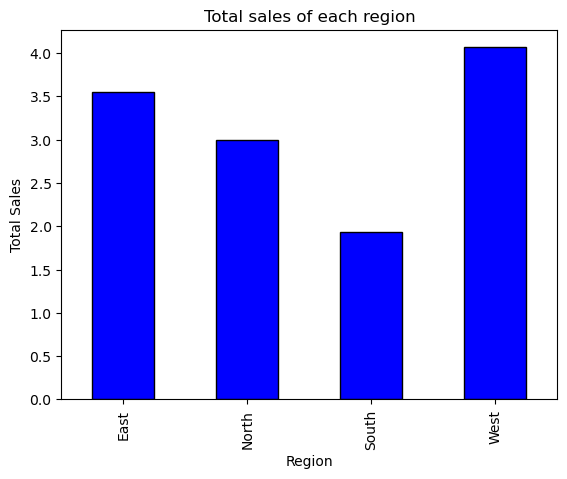

In [173]:
# Let's create a bar plot of total sales for each region using groupby()
df.groupby('region')['total_sales'].sum().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total sales of each region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## 17.Calculate the z-score for the sales column and create a new column called z_score

In [175]:
# Formula for z-score is (x-mu)/sigma.
# where x is the individual 'total_sales' value. In our case (0.762919, 0.712614, 0.075173, 0.545764 etc..)
# mu is the mean of all 'total_sales' value or the 'total_sales' column. We have a direct method in pandas as mean()
# sigma is the standard deviation of 'total_sales' value or the 'total_sales' column. We have a direct method in pandas as std()
mean_total_sales = df['total_sales'].mean()
standard_deviation_total_sales = df['total_sales'].std()
df['z-score'] = (df['total_sales'] - mean_total_sales)/standard_deviation_total_sales

# We can also achieve this in 2 steps using scipy library
# We have a readymade method called zscore in stats module of scipy library.
#from scipy.stats import zscore
#df['z_score_total_sales'] = zscore(df['total_sales'])

## 18.Group by region and find the percentage contribution of sales for each region

In [177]:
df.groupby('region').apply(lambda x:x.assign(percent_contribution=(x['total_sales']/x['total_sales'].sum())*100))
df[['region','total_sales']]
# We can also achieve the above requirement using transform()
#df.groupby('region')['total_sales'].transform(lambda x:(x/x.sum())*100)

C:\Users\Arun Kumar\AppData\Local\Temp\ipykernel_17492\832729631.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('region').apply(lambda x:x.assign(percent_contribution=(x['total_sales']/x['total_sales'].sum())*100))


,region,total_sales
0,East,0.762919
1,West,0.712614
2,North,0.075173
3,East,0.545764
4,South,0.177651
5,North,0.643033
6,East,0.598247
7,West,0.422338
8,South,0.000000
9,North,0.491874


## 19.Write a function to check if a column has outliers and return the rows containing them

In [179]:
# Let's create a definition using the parameters df, column, method & threshold.
# method-This argument helps the developer to give the flexibility of type of outlier detection such as z-score or IQR.
def detect_outliers(df, column, method='iqr', threshold=1.5):
    try:
        #column = df.columns
        if method == 'zscore':
            mu_mean = df[column].mean()
            std_dev = df[column].std()
            return df[((df[column]-mu_mean) / std_dev).abs() > threshold]
        elif method == 'iqr':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        else:
            raise ValueError ('Method must be either IQR or Z-Score')
    except Exception as e:
        print(f"The error is {e}")
    

In [180]:
# Since we don't have a huge threshold for 'total_sales' column we pass it as 0.3 to get the result.
detect_outliers(df, 'total_sales', method='iqr', threshold=0.3)

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average,z-score
8,ID_14,Name_6,South,senthalampoo,Electronics,0.000000,2024-09-26,42.0,0.784946,2022-01-11,0.000000,0.000000,0.071097,0.000000,delivered,0.003125,0.470954,0.867053,0.659619,0.660861,0.186047,0.389525,0.204124,0.751932,1.000000,0.380603,0.454780,0.574594,1.000000,0.302500,0.630802,1.000000,0.920086,0.972830,0.487912,0.474764,0.953437,0.064583,0.120163,0.496989,0.790984,0.646564,0.904348,0.132996,0.209402,0.446513,0.395928,0.585197,0.881579,0.217800,0.735941,0.376818,0.291480,0.920993,0.292952,0.231856,0.015801,0.488913,0.740206,0.647539,0.018182,0.163669,1.000000,0.895366,0.995215,0.896694,0.613636,0.945476,0.259184,0.617225,0.097222,0.502487,0.070393,0.294671,0.050000,0.960863,0.460473,0.199359,0.368848,0.330956,0.885357,0.331098,0.767717,0.347888,37101.89,Low,33.479503,4.0,0.216740,-1.734326
10,ID_16,Name_28,North,shiva,Furniture,1.000000,2024-08-29,42.0,0.645161,2022-01-13,0.919175,0.718139,1.000000,0.718139,shipped,0.156250,0.815353,0.512925,0.856237,0.740920,0.619450,0.967194,0.888660,0.998473,0.000000,0.287646,0.966408,0.050831,0.371739,0.418921,0.069620,0.082710,0.695464,0.652182,0.382418,0.436408,0.221729,0.170770,0.482688,0.682932,0.956967,0.338229,0.536957,0.505165,0.978632,0.000000,0.952489,0.609229,0.559211,0.395802,0.914425,0.924885,0.650224,0.908605,0.000000,0.361393,0.209932,0.965493,0.068041,0.373778,0.000000,0.767994,0.194969,0.382870,0.758373,0.974403,0.015152,0.178350,0.273469,0.358434,0.798611,0.222839,0.167702,0.123110,0.122727,0.902124,0.329484,0.287680,0.352361,0.536992,0.178963,0.215057,0.375631,0.278693,50669.84,High,62.480741,1.0,0.480410,1.308454
11,ID_18,Name_2,West,rama,Accessories,0.983861,2024-01-24,42.0,0.483871,2022-01-14,0.945897,0.828746,0.913708,0.828746,delivered,0.458984,0.767635,0.286083,0.858351,0.750566,0.649049,0.888983,0.173196,0.000000,0.842437,0.000000,0.736434,0.732006,0.521739,0.524371,0.715190,0.936695,0.045356,0.180015,0.698901,0.383925,0.946785,0.648198,0.824847,0.525303,0.329918,0.237099,0.613043,0.636162,0.147436,0.594375,0.884615,0.528601,0.530702,0.177658,0.234719,0.635189,0.085202,0.476931,0.751101,0.233766,0.223476,0.080006,0.597938,0.515138,0.203030,0.660043,0.253669,0.000000,0.318182,0.173123,0.313131,0.881751,0.071429,0.268390,0.275463,0.862855,1.000000,0.401653,0.752273,0.208315,0.211565,0.071057,0.569762,0.235508,0.699959,0.707816,0.128943,1.000000,59507.07,High,57.691720,1.0,0.761281,1.259345
20,ID_38,Name_11,South,Product_5,Clothing,0.970963,2024-08-09,40.0,0.989247,2022-01-22,1.000000,0.935943,0.886405,0.935943,returned,0.034375,0.929461,0.485362,0.160677,0.540407,0.139535,0.324076,0.859794,0.053740,0.042017,0.588331,0.860465,0.620907,0.693478,0.672976,0.238397,0.561795,0.220302,0.384335,0.514286,0.272990,0.334812,0.562925,0.902240,0.583232,0.862705,0.272612,0.539130,0.973534,0.568376,0.412721,1.000000,1.000000,0.822368,0.761049,0.838631,0.804110,0.849776,0.287112,0.892070,0.351021,0.176072,0.718893,0.000000,0.000000,0.187879,0.774304,0.953878,0.304119,0.964115,0.720508,0.027778,0.735051,0.597959,1.000000,0.125000,0.938997,0.000000,0.446221,0.363636,0.585976,0.808119,0.374804,0.557613,0.081597,0.222509,0.254616,0.292124,0.852352,107200.46,High,56.577530,1.0,0.401982,1.220099


## 20.Convert a column with currency values (e.g., "$100") into numerical values

In [182]:
# Since we don't have the currency values, let's first create it.
df['currency'] = np.random.randint(20, 800, size=len(df))
# Now we shall add '$' as currency prefix to all 'currency' values. This can be achieved in 3 ways.
df['currency'] = df['currency'].apply(lambda x:f"${x:.2f}") # first method, using apply()
#df['currency'] = df['currency'].map("${:,.2f}".format) # using map()
#df.style.format({"currency":"${:,.2f}"}) # using style.format()

In [183]:
# Now let's convert the currency column into numerical column by removing the '$' symbol
# The regex pattern is used in replace() and removes the $ sign
# Finally converting the Object type to float datatype.
df['currency'] = df['currency'].str.replace(r'[^\d.]', "", regex=True).astype(float)

In [184]:
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average,z-score,currency
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,0.053030,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717,2.0,NaN,0.587069,297.0
1,ID_5,Name_18,West,Product_8,Food,0.712614,2024-11-26,28.0,0.268817,2022-01-04,0.771160,0.596408,0.858106,0.596408,ordered,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,0.727273,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069,13426.93,Medium,73.418817,4.0,NaN,0.434000,524.0
2,ID_6,Name_16,North,senthalampoo,Food,0.075173,2024-12-02,42.0,0.172043,2022-01-05,0.045834,0.084416,0.056043,0.084416,pending,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,0.032828,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329,14422.29,Low,2.716605,5.0,0.512865,-1.505593,795.0
3,ID_7,Name_15,East,Aran,Food,0.545764,2024-05-06,64.0,0.118280,2022-01-07,0.394864,0.473948,0.261243,0.473948,delivered,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,1.000000,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689,19478.80,Medium,24.530160,5.0,0.391797,-0.073686,65.0
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,60.0,0.215054,2022-01-07,0.129665,0.164350,0.122531,0.

## 21. Extract all rows where the column id has duplicate values

In [186]:
# Since there is no duplicate in 'ID' column, we get an empty row as the result.
df[df['id'].isnull()]

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average,z-score,currency


## 22.Create a stacked bar chart for sales across region and category

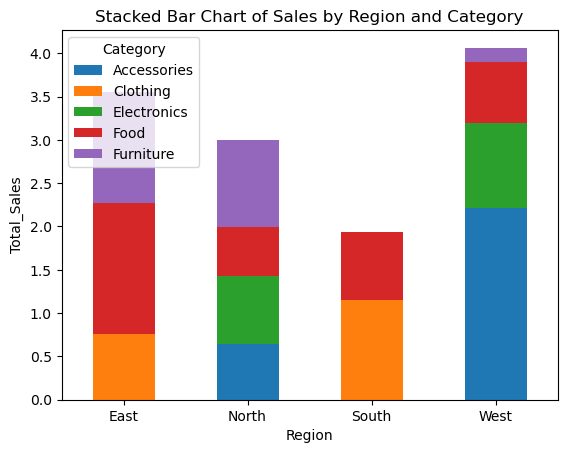

In [188]:
df.groupby(['region', 'category'])['total_sales'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total_Sales')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()

In [189]:
"""
# Another method to Create a stacked bar chart for sales across region and category

# Step 1: Pivot the Data to get stacked values
df_pivot = df.pivot(index='region', columns='category', values='total_sales')

# Step 2: Set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for categories
colors = sns.color_palette("Set2", len(df_pivot.columns))

# Step 3: Plot each category stacked on the previous one
bottom = None
for idx, category in enumerate(df_pivot.columns):
    sns.barplot(x=df_pivot.index, y=df_pivot[category], color=colors[idx], ax=ax, label=category, bottom=bottom)
    bottom = df_pivot[category] if bottom is None else bottom + df_pivot[category]

# Step 4: Customize the chart
plt.title('Stacked Bar Chart of Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.xticks(rotation=0)

# Step 5: Show the Plot
plt.show()
"""

'\n# Another method to Create a stacked bar chart for sales across region and category\n\n# Step 1: Pivot the Data to get stacked values\ndf_pivot = df.pivot(index=\'region\', columns=\'category\', values=\'total_sales\')\n\n# Step 2: Set up plot\nfig, ax = plt.subplots(figsize=(8, 6))\n\n# Define colors for categories\ncolors = sns.color_palette("Set2", len(df_pivot.columns))\n\n# Step 3: Plot each category stacked on the previous one\nbottom = None\nfor idx, category in enumerate(df_pivot.columns):\n    sns.barplot(x=df_pivot.index, y=df_pivot[category], color=colors[idx], ax=ax, label=category, bottom=bottom)\n    bottom = df_pivot[category] if bottom is None else bottom + df_pivot[category]\n\n# Step 4: Customize the chart\nplt.title(\'Stacked Bar Chart of Sales by Region and Category\')\nplt.xlabel(\'Region\')\nplt.ylabel(\'Total Sales\')\nplt.legend(title=\'Category\')\nplt.xticks(rotation=0)\n\n# Step 5: Show the Plot\nplt.show()\n'

## 23.Write a script to identify and remove outliers from the column quantity

In [191]:
# We use zscore method to identify outliers of 'quantity' column.
# The default threshold value for zscore is 3
# We use zscore formula(x-mu/sigma) to calculate
# |z| > 3 (absolute values of z-score) greater than 3 or lesser than -3 are considered as outliers.
mean_quantity = df['quantity'].mean()
std_quantity = df['quantity'].std()
quantity_zscore = (df['quantity']-mean_quantity)/std_quantity
df_filtered = df[(quantity_zscore.abs() > 3) | (quantity_zscore.abs() < -3)]

In [192]:
# Since there is no absolute zscore (|z|) values greater than 3 or lesser than -3, we get an empty result
# quantity_zscore.abs()
df_filtered

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average,z-score,currency


## 24.Pivot a DataFrame such that product becomes rows and region becomes columns

In [194]:
#pd.pivot(df, columns='region', values='product')
pd.pivot_table(df, index="product", columns="region", values="total_sales", aggfunc="sum")

region,East,North,South,West
product,,,,
Aran,0.545764,NaN,NaN,NaN
Arun,0.762919,NaN,NaN,NaN
Product_10,0.076034,NaN,NaN,NaN
Product_17,NaN,0.782795,NaN,NaN
Product_18,NaN,NaN,0.787603,NaN
Product_20,NaN,0.643033,NaN,0.422338
Product_4,NaN,NaN,NaN,0.805274
Product_5,NaN,NaN,0.970963,0.167457
Product_6,0.598247,NaN,NaN,0.159551


## 25.Add a column that indicates whether a row's profit is above or below the average

In [196]:
# Let's first get the average(mean) of profit to identify whether it is below or above average
average_profit = df['profit'].mean()
df['average_indicator'] = df['profit'].apply(lambda x:'Above Average' if x > average_profit else 'Below Average')

In [197]:
df[['profit', 'average_indicator']]

,profit,average_indicator
0,0.624447,Above Average
1,0.858106,Above Average
2,0.056043,Below Average
3,0.261243,Below Average
4,0.122531,Below Average
5,0.753537,Above Average
6,0.451908,Above Average
7,0.127216,Below Average
8,0.071097,Below Average
9,0.370135,Below Average


## 26.Write a script to find the first occurrence of a value greater than 100 in the column sales

In [199]:
# Since we don't have required information in 'df' DataFrame, we are using 'data' DataFrame.
data['sales'] = np.random.randint(80, 150, size=len(data))
# There are 2 ways in which we can achieve the requirement. First method is using index[]
# First method:
first_occurance = data.index[data['sales'] > 100][0] if any(data['sales']>100) else None
print(first_occurance)
# Second method is using idxmax() which is very straight forward method.
#first_idxmax = (data['sales'] > 100).idxmax()
#first_idxmax

1


## 27.Count the number of rows with missing values in the column price

In [201]:
# Let's first check the missing values of a price column
df['price'].isnull().sum()

0

In [202]:
# Since there is no missing values in price column, let's replace few values (21 values) randomly with NaN
df.loc[np.random.choice(df.index, size=21, replace=False), 'col_62'] = np.nan

In [203]:
price_missing_values = df['col_62'].isnull().sum()
print(f"The count of missing values of price column is : {price_missing_values}")

The count of missing values of price column is : 21


## 28.Create a DataFrame showing the cumulative percentage of sales for each category

In [205]:
cumulative_sales = df.groupby('category')['total_sales'].apply(lambda x:x.cumsum() / x.sum() * 100)
cum_percent = pd.DataFrame(cumulative_sales)
print(cum_percent)

                total_sales
category                   
Accessories 5     22.526949
            7     37.322446
            11    71.789373
            17   100.000000
Clothing    0     39.911374
            4     49.205034
            20   100.000000
Electronics 8      0.000000
            14    46.095865
            16    90.500834
            19   100.000000
Food        1     19.938341
            2     22.041607
            3     37.311640
            9     51.073858
            12    73.110342
            21   100.000000
Furniture   6     24.552563
            10    65.593408
            13    72.141534
            15    75.262014
            18   100.000000


## 29.Write a script to unstack a multi-index DataFrame

In [207]:
# We already have a multi index DataFrame called multi_index. So we use unstack() to unstack it
unstack_index = multi_index.unstack(level='State')
print(unstack_index)

        Purchase                                                     Sales  \
State    Chicago  Kerala Montreal San Francisco Tamil Nadu Toronto Chicago   
Country                                                                      
America   1365.0     NaN      NaN        2489.0        NaN     NaN  1195.0   
Canada       NaN     NaN   2686.0           NaN        NaN  1250.0     NaN   
India        NaN  1680.0      NaN           NaN      351.0     NaN     NaN   

                                                           Profit          \
State    Kerala Montreal San Francisco Tamil Nadu Toronto Chicago  Kerala   
Country                                                                     
America     NaN      NaN          62.0        NaN     NaN  2584.0     NaN   
Canada      NaN    601.0           NaN        NaN   980.0     NaN     NaN   
India    2705.0      NaN           NaN     1757.0     NaN     NaN  2037.0   

                                                   Margin           

## 30.Extract the 10 rows with the lowest profit

In [209]:
# We can extract 10 rows with lowest profit using nsmallest() on 'profit' column
lowest_profit = df.nsmallest(10, 'profit')
print(lowest_profit)

       id     name region       product     category  total_sales order_date  \
21  ID_39  Name_45   East  senathipathi         Food     0.961060 2024-04-13   
12  ID_22  Name_33  South    Product_18         Food     0.787603 2024-01-13   
15  ID_25  Name_36   East    Product_10    Furniture     0.076034 2024-06-10   
2    ID_6  Name_16  North  senthalampoo         Food     0.075173 2024-12-02   
8   ID_14   Name_6  South  senthalampoo  Electronics     0.000000 2024-09-26   
4    ID_8   Name_9  South          rama     Clothing     0.177651 2024-09-04   
7   ID_12  Name_48   West    Product_20  Accessories     0.422338 2024-06-01   
18  ID_34  Name_38   East     Product_9    Furniture     0.602765 2024-04-16   
19  ID_36   Name_1   West     Product_5  Electronics     0.167457 2024-10-25   
13  ID_23  Name_39   West     Product_6    Furniture     0.159551 2024-06-16   

    price  quantity        date   revenue      cost    profit  \
21    7.0  0.881720  2022-01-22  0.596646  1.000000  0

In [210]:
df.head()

,id,name,region,product,category,total_sales,order_date,price,quantity,date,revenue,cost,profit,discounted_price,status,rating,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,fan_id,table_id,board_id,door_id,cloth_id,book_id,bag_id,doll_id,light_id,cumulative_sales,sales_category,profit_margin,sales_rank,rolling_profit_average,z-score,currency,average_indicator
0,ID_2,Name_8,East,Arun,Clothing,0.762919,2024-08-10,42.0,1.000000,2022-01-02,0.772361,0.783364,0.624447,0.783364,shipped,0.458984,0.620332,0.752840,0.295983,0.666760,0.657505,0.732450,0.569072,0.184501,0.084034,0.816720,0.281654,0.950130,0.558696,0.097720,0.881857,0.541638,1.000000,0.580030,0.751648,0.145565,0.002217,0.866659,0.830957,0.953806,0.440574,0.572978,0.384783,0.824119,0.192308,0.500698,0.054299,0.625223,0.995614,0.000000,0.315403,0.155299,0.607623,0.080858,0.671806,0.964408,0.257336,1.000000,0.921649,0.804122,0.893939,0.003720,0.507338,0.974369,1.000000,0.445519,NaN,0.986163,0.969388,0.732998,0.798611,0.957874,0.511387,0.116455,0.368182,0.672468,0.551289,0.530714,0.288022,0.631579,0.668087,0.670603,0.244462,0.476602,6930.53,Medium,48.884717,2.0,NaN,0.587069,297.0,Above Average
1,ID_5,Name_18,West,Product_8,Food,0.712614,2024-11-26,28.0,0.268817,2022-01-04,0.771160,0.596408,0.858106,0.596408,ordered,0.458984,0.688797,0.347241,0.211416,0.378013,0.985201,1.000000,0.379381,1.000000,0.254202,0.213677,0.214470,0.789540,0.463043,0.000000,0.464135,0.526438,0.790497,0.991072,0.953846,0.520519,0.175166,0.860077,0.128310,0.776941,0.663934,0.049539,0.173913,0.494451,0.350427,0.699650,0.325792,0.508972,0.807018,0.978075,0.444988,0.271706,0.230942,0.177008,0.539648,0.027347,0.327314,0.833281,0.107216,1.000000,0.469697,0.725508,0.123690,0.227787,0.220096,1.000000,NaN,1.000000,0.114286,0.665702,1.000000,0.655168,0.478261,0.000000,0.534091,0.282825,0.306818,0.590280,0.526345,0.293912,0.880026,0.449100,0.408930,0.460069,13426.93,Medium,73.418817,4.0,NaN,0.434000,524.0,Above Average
2,ID_6,Name_16,North,senthalampoo,Food,0.075173,2024-12-02,42.0,0.172043,2022-01-05,0.045834,0.084416,0.056043,0.084416,pending,0.465625,0.489627,0.783649,0.598309,0.294317,0.651163,0.286692,0.169072,0.284827,0.231092,0.763371,0.896641,0.857125,0.941304,0.698720,0.000000,0.966776,0.095032,0.893774,0.797802,0.730352,0.412417,0.783698,0.902240,0.585593,0.012295,0.994681,0.491304,0.499480,0.155983,0.097487,0.061086,0.353442,0.903509,0.405152,0.085575,0.753297,0.641256,0.237934,0.612335,0.912822,0.963883,0.968354,0.004124,0.982217,0.163636,0.000000,0.253669,0.992768,0.892344,0.249209,NaN,0.452736,0.904082,0.000000,0.210648,0.912912,0.683230,0.647950,0.393182,0.490491,0.245757,0.714948,0.481651,0.226997,0.699477,0.421383,0.390509,0.147329,14422.29,Low,2.716605,5.0,0.512865,-1.505593,795.0,Below Average
3,ID_7,Name_15,East,Aran,Food,0.545764,2024-05-06,64.0,0.118280,2022-01-07,0.394864,0.473948,0.261243,0.473948,delivered,0.796875,0.002075,0.370599,0.663848,1.000000,0.708245,0.581741,0.977320,0.290173,0.449580,0.073185,0.961240,0.898518,0.036957,0.290268,0.831224,0.680774,0.606911,1.000000,0.756044,0.678672,1.000000,0.659664,0.038697,0.000000,0.377049,0.858182,0.000000,0.518625,0.717949,0.817922,0.488688,0.502191,0.975877,0.453409,0.215159,1.000000,0.585202,0.730008,0.211454,0.252177,0.695260,0.283695,1.000000,0.591473,0.918182,0.396522,0.199161,0.239669,0.000000,0.096210,NaN,0.320226,0.938776,0.717643,0.793981,0.127628,0.161491,0.548961,0.000000,0.845608,1.000000,0.615874,0.782863,0.973223,0.656665,0.163749,0.000000,0.674689,19478.80,Medium,24.530160,5.0,0.391797,-0.073686,65.0,Below Average
4,ID_8,Name_9,South,rama,Clothing,0.177651,2024-09-04,

In [211]:
# We export the data to csv and start the difficult type question in new kernel since the page grows.

df.to_csv(r'E:\Study\Projects\EDA\pandas_practice_dataframe_output.csv', index=False)